In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Leitura dos dados
df_train = pd.read_csv('../data/raw/application_train.csv')
df_test = pd.read_csv('../data/raw/application_test.csv')

In [3]:
df_train.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [4]:
df_test.head()

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   
3             2          315000.0   1575000.0      49018.5        1575000.0   
4             1          180000.0    625500.0      32067.0         625500.0   

   ... FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                0                0                0                0   
1  ...                0                0                0                0   
2  ...                0                0                0                0   
3  ...                0                0                0                0   
4  ...                0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         0.0  
1                        0.0                         3.0  
2                        1.0                         4.0  
3                        0.0                         3.0  
4                        NaN                         NaN  

[5 rows x 121 columns]

Exploração inicial dos dados

In [5]:
print(df_train.shape)
print(df_train.dtypes.value_counts())
df_train['TARGET'].value_counts(normalize=True)

(307511, 122)
float64    65
int64      41
object     16
Name: count, dtype: int64


TARGET
0    0.919271
1    0.080729
Name: proportion, dtype: float64

In [6]:
df_train.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  ...  \
count               307511.000000  307511.000000  307511.000000  ...   
mean                     0.020868  -16036.995067   63815.045904  ...   
std                      0.013831    4363.988632  141275.766519  ...   
min                      0.000290  -25229.000000  -17912.000000  ...   
25%                      0.010006  -19682.000000   -2760.000000  ...   
50%                      0.018850  -15750.000000   -1213.000000  ...   
75%                      0.028663  -12413.000000    -289.000000  ...   
max                      0.072508   -7489.000000  365243.000000  ...   

       FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
count     307511.000000     307511.000000     307511.000000     307511.000000   
mean           0.008130          0.000595          0.000507          0.000335   
std            0.089798          0.024387          0.022518          0.018299   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000          0.000000   
75%            0.000000          0.000000          0.000000          0.000000   
max            1.000000          1.000000          1.000000          1.000000   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count               265992.000000              265992.000000   
mean                     0.006402                   0.007000   
std                      0.083849                   0.110757   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      4.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               265992.000000              265992.000000   
mean                     0.034362                   0.267395   
std                      0.204685                   0.916002   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      8.000000                  27.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count              265992.000000               265992.000000  
mean                    0.265474                    1.899974  
std                     0.794056                    1.869295  
min                     0.000000                    0.000000  
25%              

Visualização do target

Text(0.5, 0, '0 = Cumpre | 1 = Descumpre')

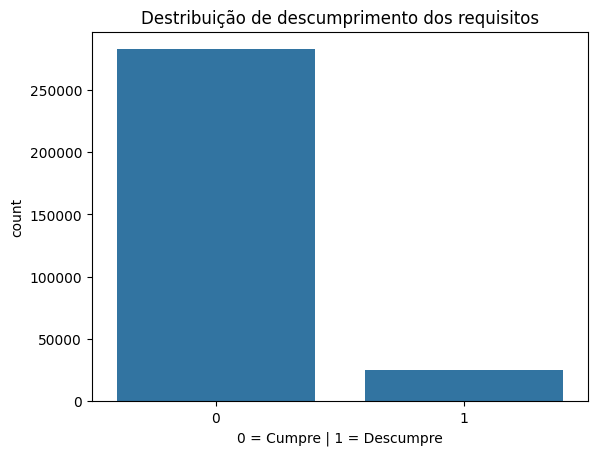

In [7]:
sns.countplot(data=df_train, x='TARGET')
plt.title('Destribuição de descumprimento dos requisitos')
plt.xlabel('0 = Cumpre | 1 = Descumpre')

Tratamento de valores ausentes

In [8]:
missing = df_train.isnull().mean().sort_values(ascending=False)

missing_cols = missing[missing>0.5]
print(f'Colunas com mais de 50% de valores ausentes: {missing_cols}')

Colunas com mais de 50% de valores ausentes: COMMONAREA_AVG              0.698723
COMMONAREA_MODE             0.698723
COMMONAREA_MEDI             0.698723
NONLIVINGAPARTMENTS_MEDI    0.694330
NONLIVINGAPARTMENTS_MODE    0.694330
NONLIVINGAPARTMENTS_AVG     0.694330
FONDKAPREMONT_MODE          0.683862
LIVINGAPARTMENTS_AVG        0.683550
LIVINGAPARTMENTS_MEDI       0.683550
LIVINGAPARTMENTS_MODE       0.683550
FLOORSMIN_MODE              0.678486
FLOORSMIN_AVG               0.678486
FLOORSMIN_MEDI              0.678486
YEARS_BUILD_AVG             0.664978
YEARS_BUILD_MODE            0.664978
YEARS_BUILD_MEDI            0.664978
OWN_CAR_AGE                 0.659908
LANDAREA_MEDI               0.593767
LANDAREA_AVG                0.593767
LANDAREA_MODE               0.593767
BASEMENTAREA_MODE           0.585160
BASEMENTAREA_MEDI           0.585160
BASEMENTAREA_AVG            0.585160
EXT_SOURCE_1                0.563811
NONLIVINGAREA_MODE          0.551792
NONLIVINGAREA_AVG           0.

In [9]:
# input da media pra valores nulos em features numericas
df_train['AMT_INCOME_TOTAL'].fillna(df_train['AMT_INCOME_TOTAL'].mean(), inplace=True)

C:\Users\mathe\AppData\Local\Temp\ipykernel_12608\1867317616.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['AMT_INCOME_TOTAL'].fillna(df_train['AMT_INCOME_TOTAL'].mean(), inplace=True)


In [10]:
# Lista de colunas importantes para manter
important_columns = [
    'OWN_CAR_AGE', 
    'EXT_SOURCE_1', 
    'YEARS_BUILD_AVG', 'YEARS_BUILD_MODE', 'YEARS_BUILD_MEDI',
    'LIVINGAREA_AVG', 'LIVINGAREA_MEDI', 'LIVINGAREA_MODE',
    'HOUSETYPE_MODE'
]

In [11]:
# Remove as colunas com mais de 50% do valor ausente
cols_to_drop = [col for col in missing_cols.index if col not in important_columns]
df_train = df_train.drop(columns=cols_to_drop)

In [12]:
# tratando os valores nulos mantidos
# OWN_CAR_AGE: Sem carro = 0
df_train['OWN_CAR_AGE'].fillna(0, inplace=True)

# EXT_SOURCE_1: Média
df_train['EXT_SOURCE_1'].fillna(df_train['EXT_SOURCE_1'].mean(), inplace=True)

# YEARS_BUILD: Média
for col in ['YEARS_BUILD_AVG', 'YEARS_BUILD_MODE', 'YEARS_BUILD_MEDI']:
    df_train[col].fillna(df_train[col].mean(), inplace=True)

# LIVINGAREA: Média
for col in ['LIVINGAREA_AVG', 'LIVINGAREA_MEDI', 'LIVINGAREA_MODE']:
    df_train[col].fillna(df_train[col].mean(), inplace=True)

# HOUSETYPE_MODE: "Unknown"
df_train['HOUSETYPE_MODE'].fillna('Unknown', inplace=True)

C:\Users\mathe\AppData\Local\Temp\ipykernel_12608\1764058664.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['OWN_CAR_AGE'].fillna(0, inplace=True)
C:\Users\mathe\AppData\Local\Temp\ipykernel_12608\1764058664.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

## Análise Exploratória de Dados (EDA)

In [13]:
print("Formato do dataset:", df_train.shape)
print(df_train.dtypes)

Formato do dataset: (307511, 90)
SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 90, dtype: object


In [14]:
print(df_train.isnull().sum().sort_values(ascending=False))

FLOORSMAX_MEDI                  153020
FLOORSMAX_MODE                  153020
FLOORSMAX_AVG                   153020
YEARS_BEGINEXPLUATATION_AVG     150007
YEARS_BEGINEXPLUATATION_MODE    150007
                                 ...  
FLAG_DOCUMENT_16                     0
FLAG_DOCUMENT_15                     0
FLAG_DOCUMENT_14                     0
FLAG_DOCUMENT_20                     0
FLAG_DOCUMENT_21                     0
Length: 90, dtype: int64


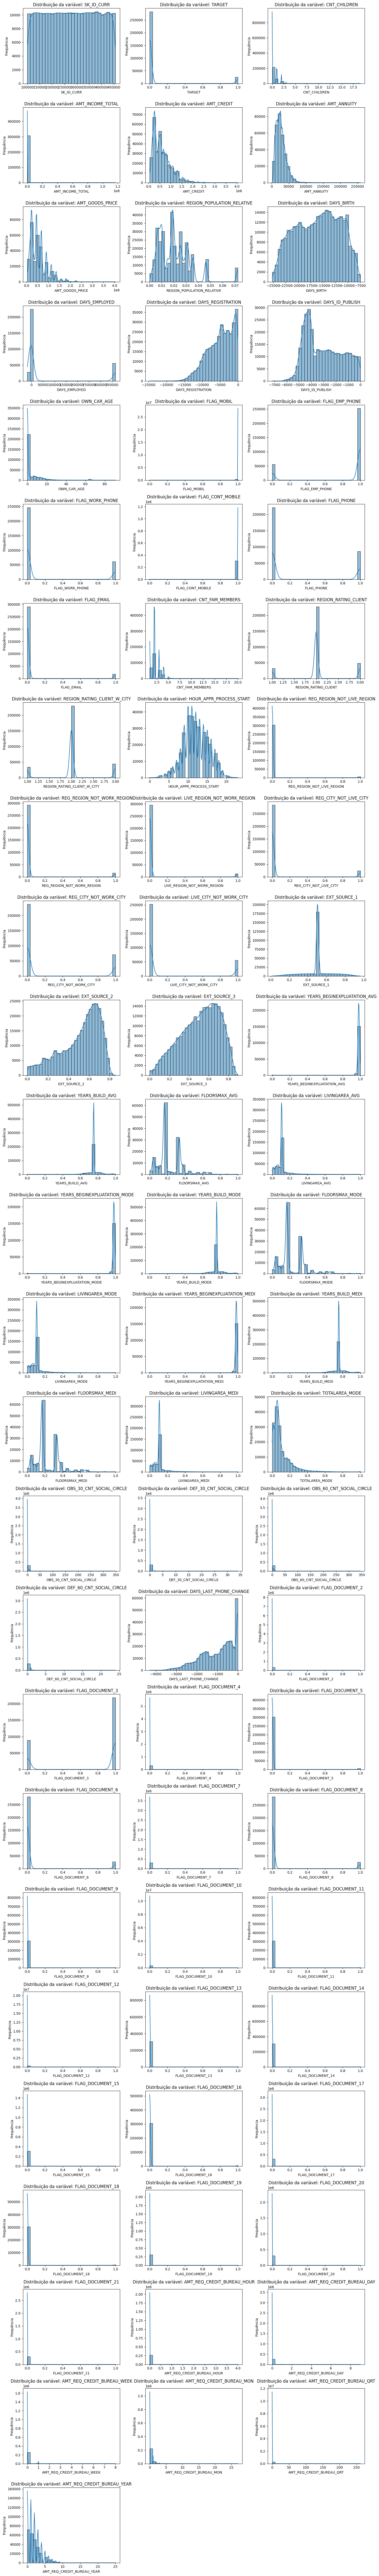

In [15]:
# lista das variaveis numericas
numerical_features = df_train.select_dtypes(include=['float64', 'int64']).columns

num_cols = 3 
num_rows = (len(numerical_features) + num_cols - 1) // num_cols  # calcula o número de linhas necessárias

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 4))
axes = axes.flatten() 

# histograma para cada feature numérica
for i, col in enumerate(numerical_features):
    sns.histplot(df_train[col], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f'Distribuição da variável: {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequência')

# remove eixos vazios
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

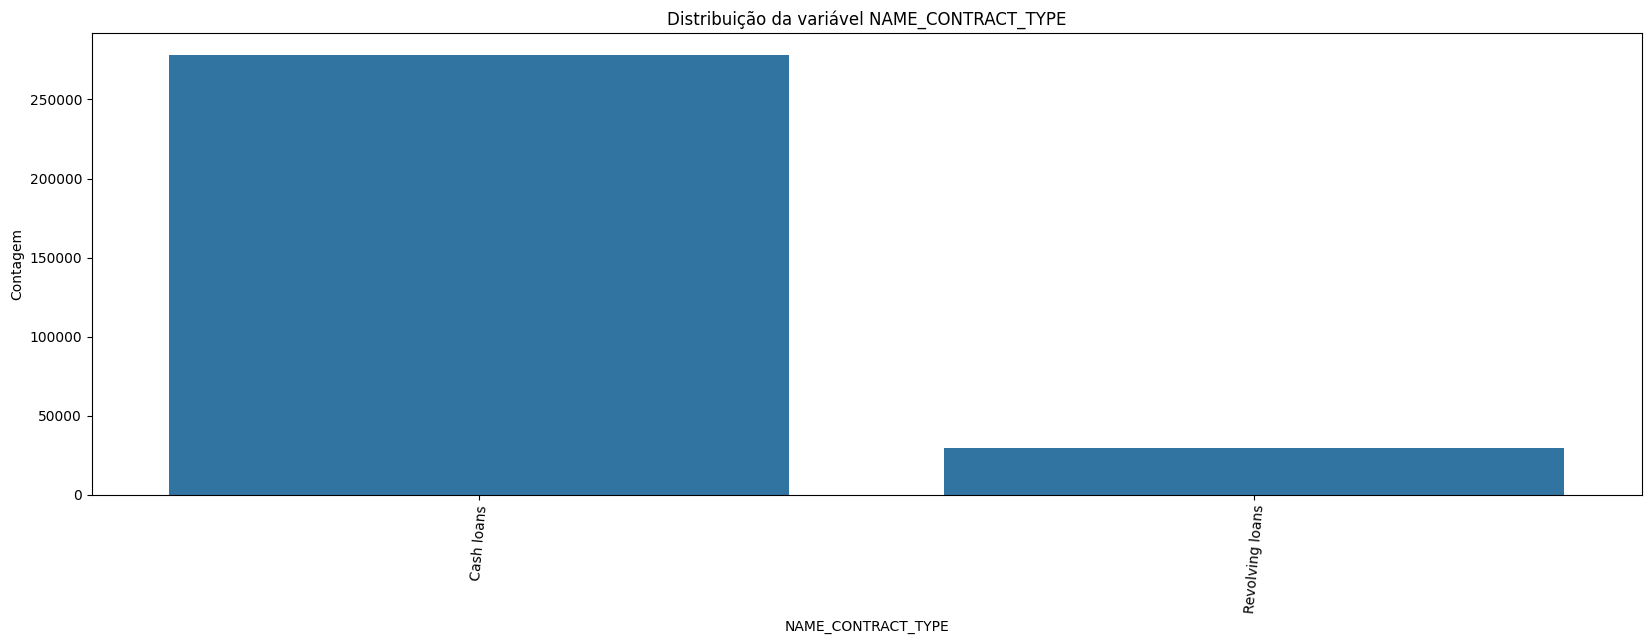

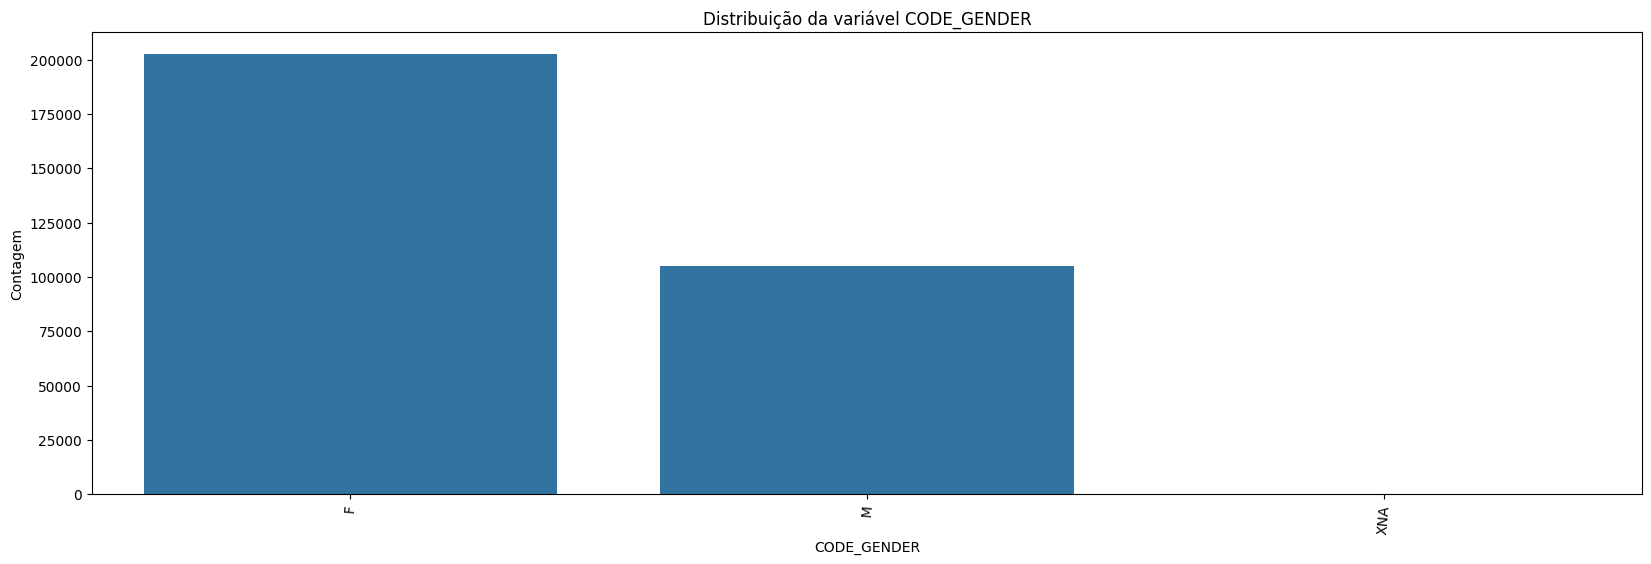

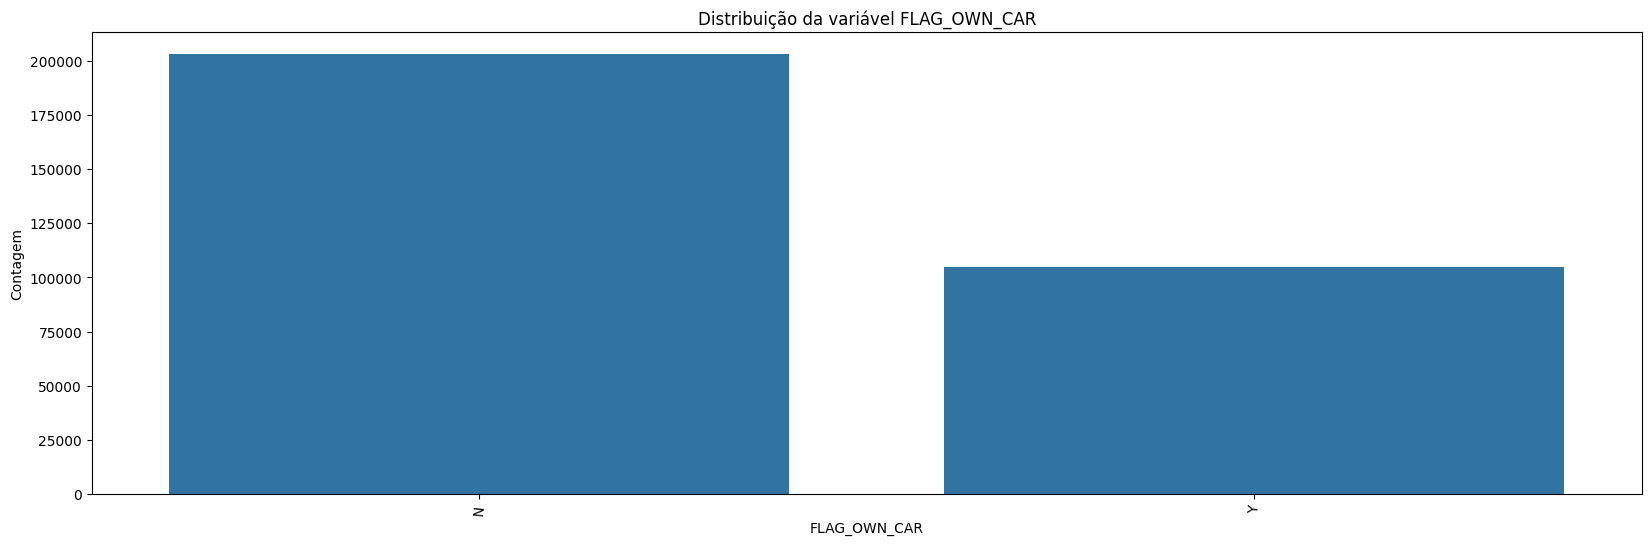

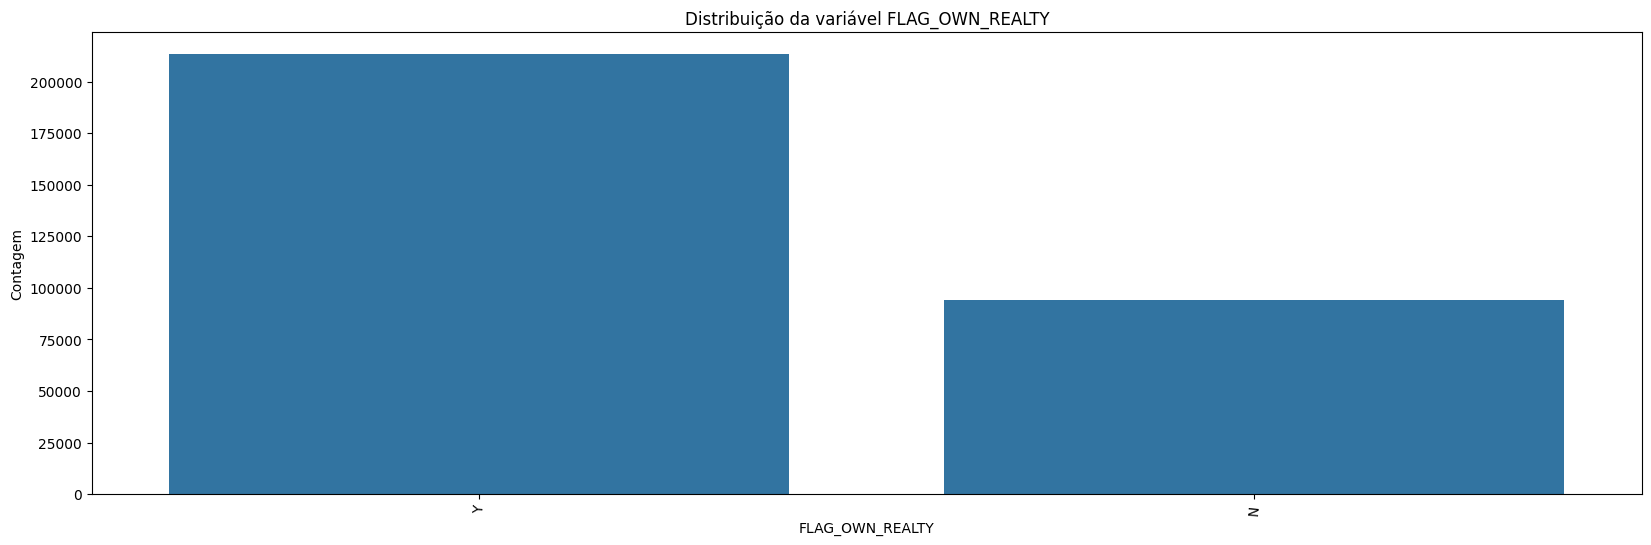

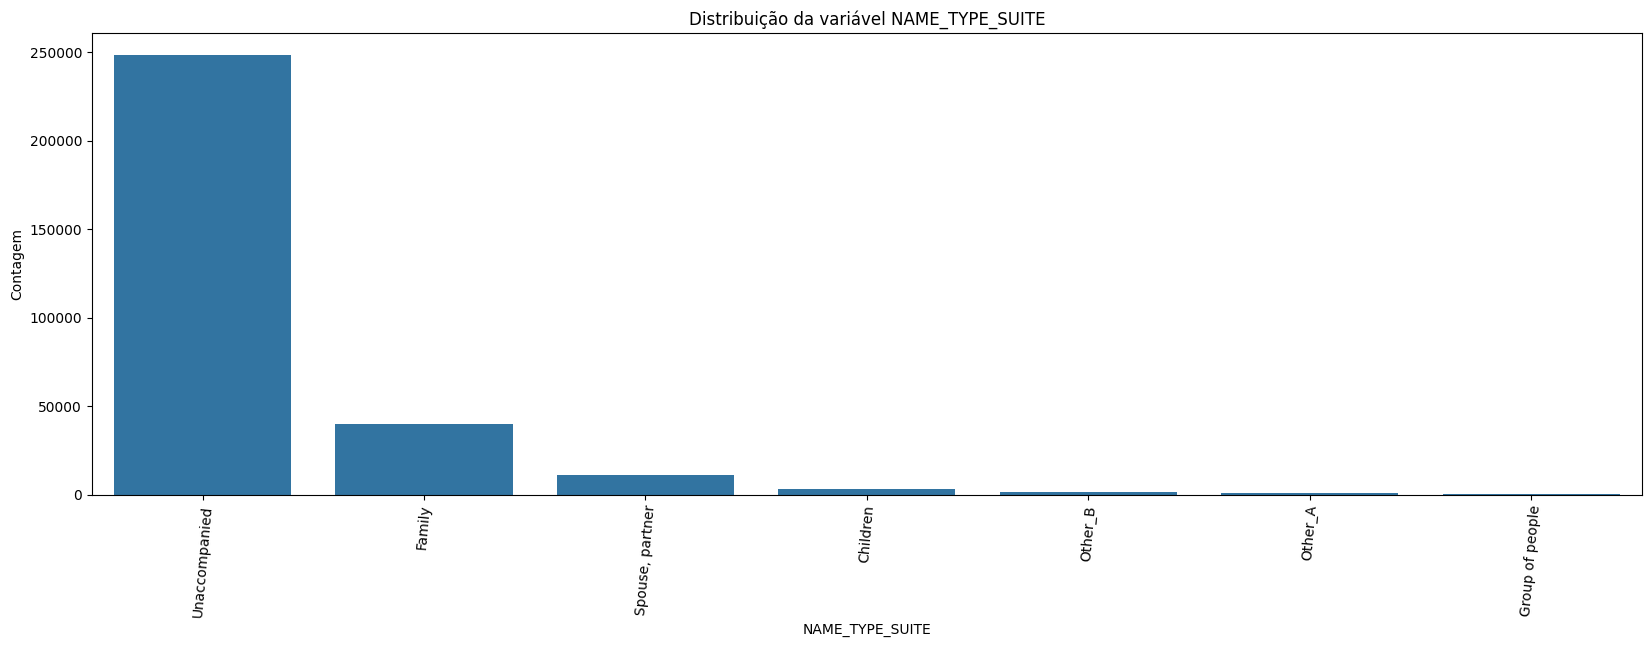

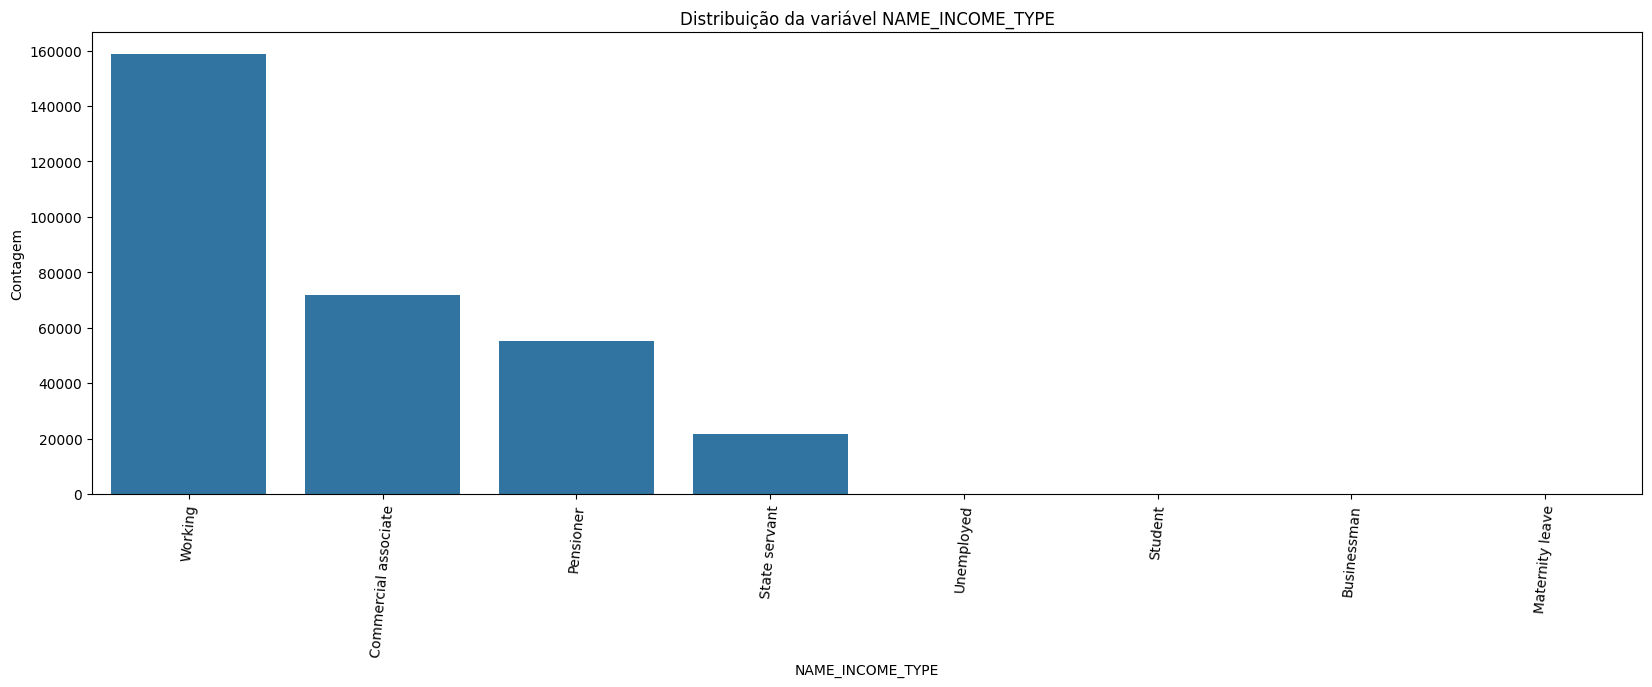

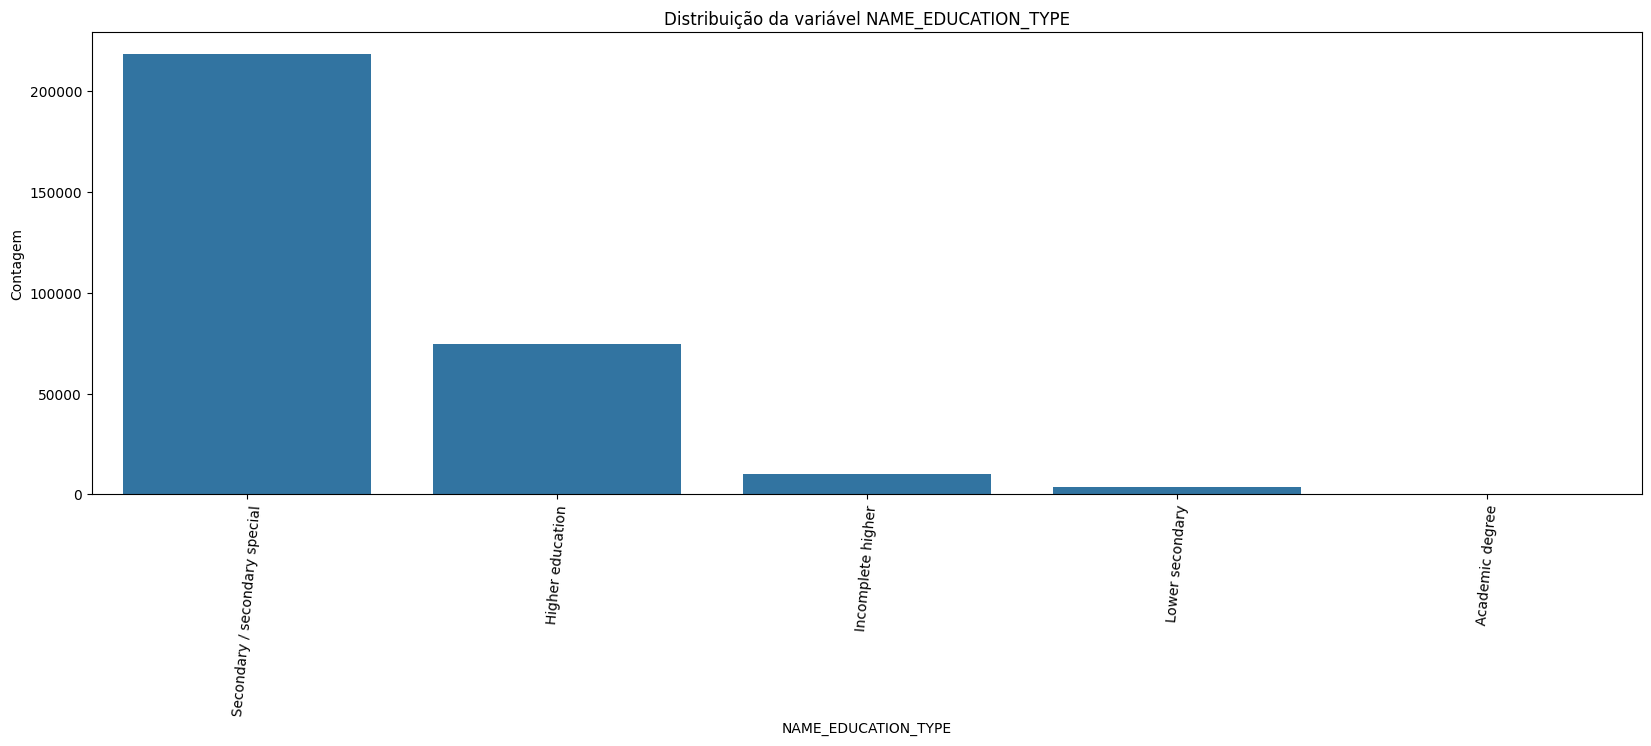

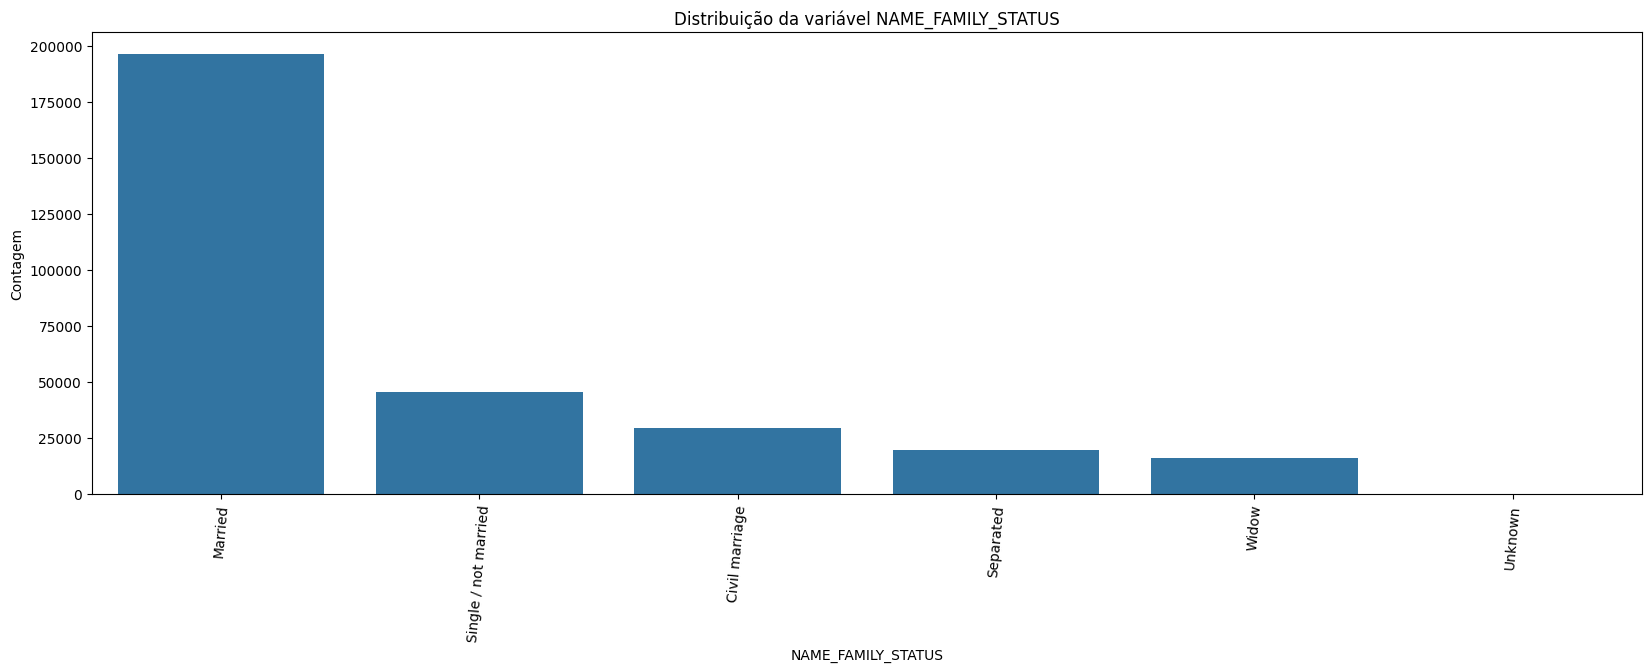

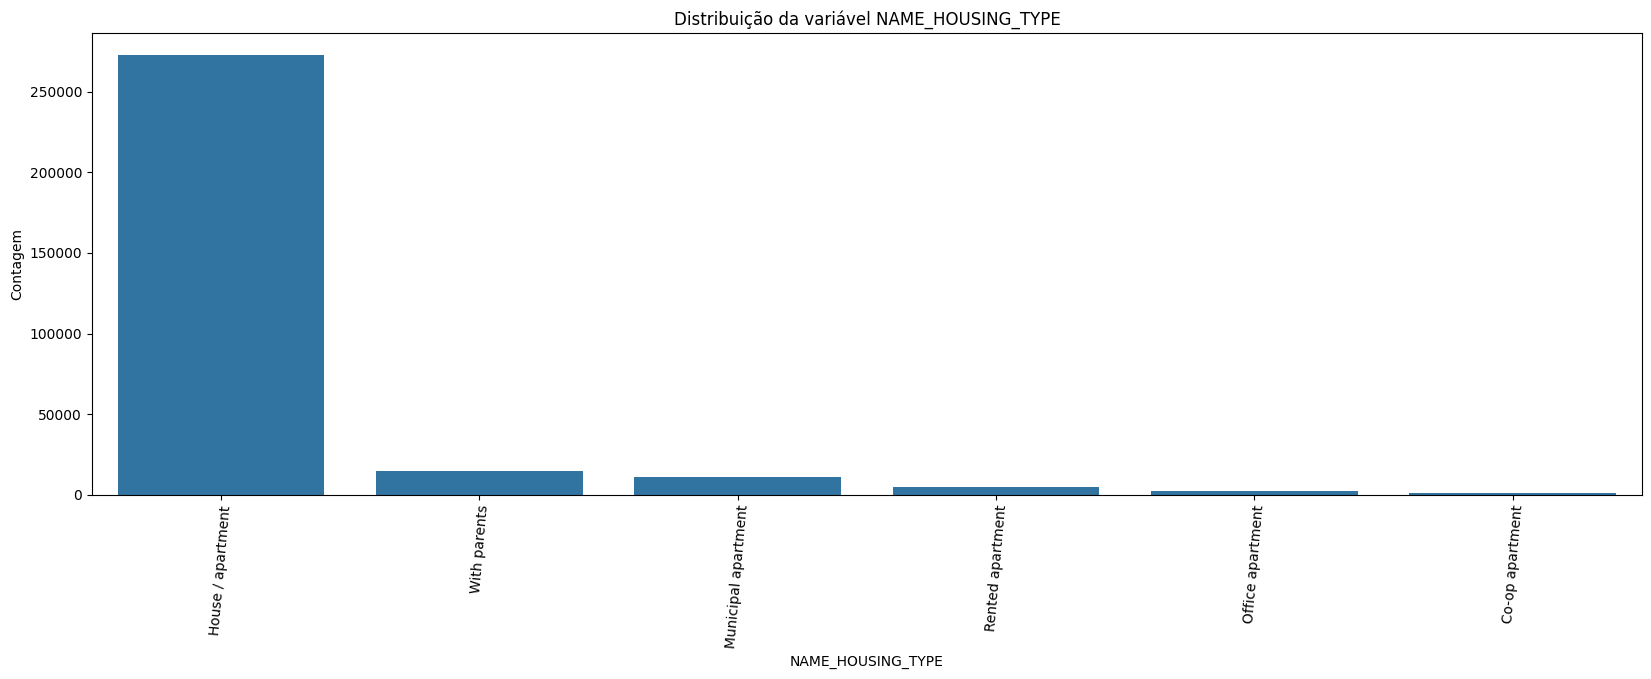

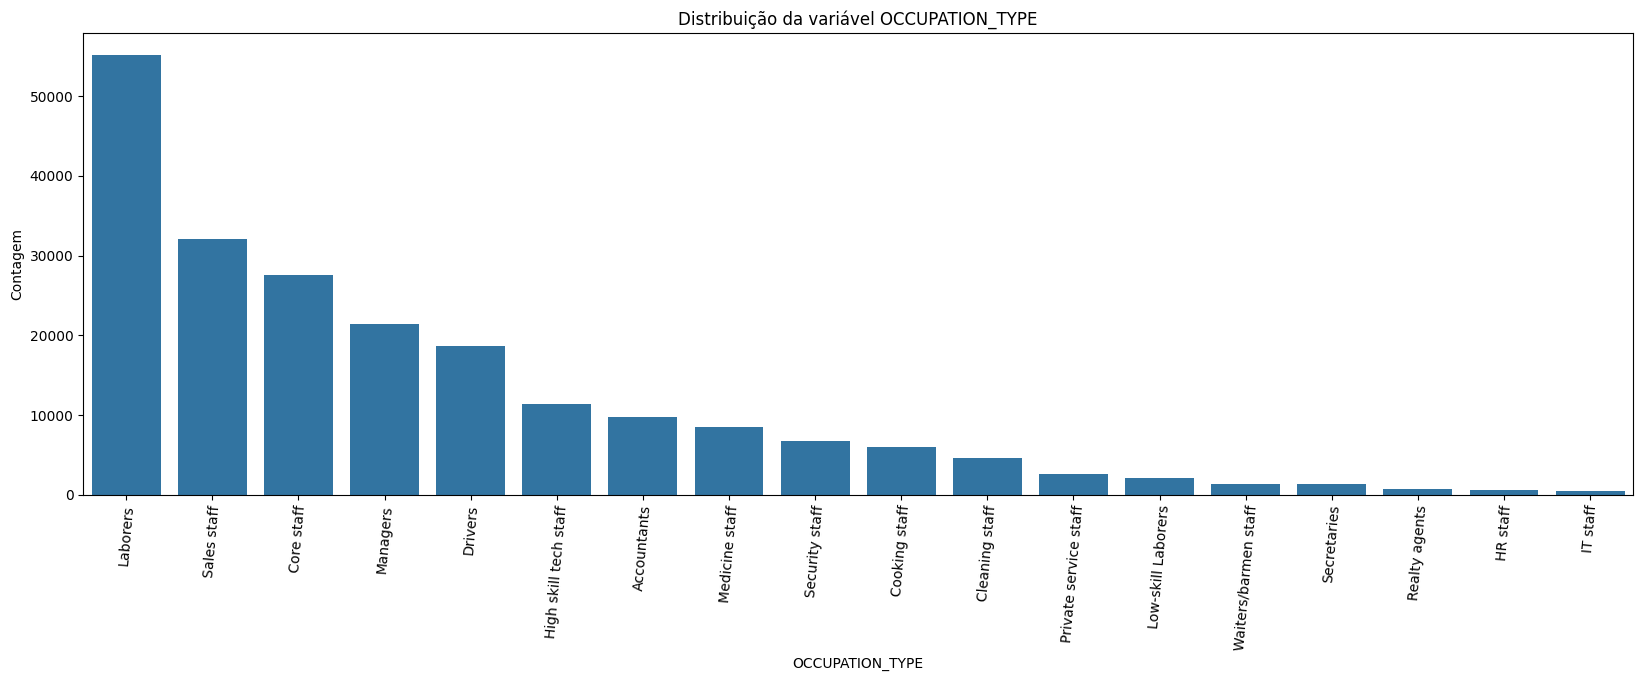

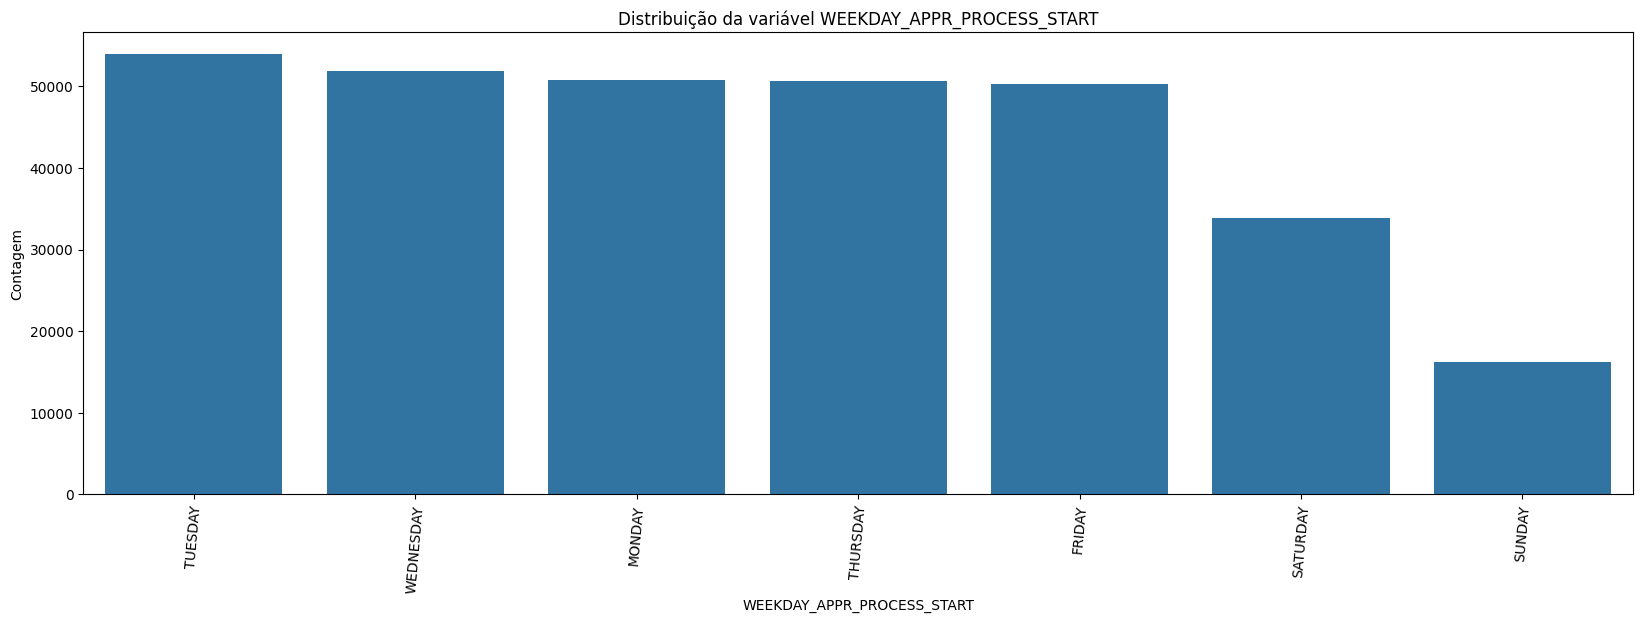

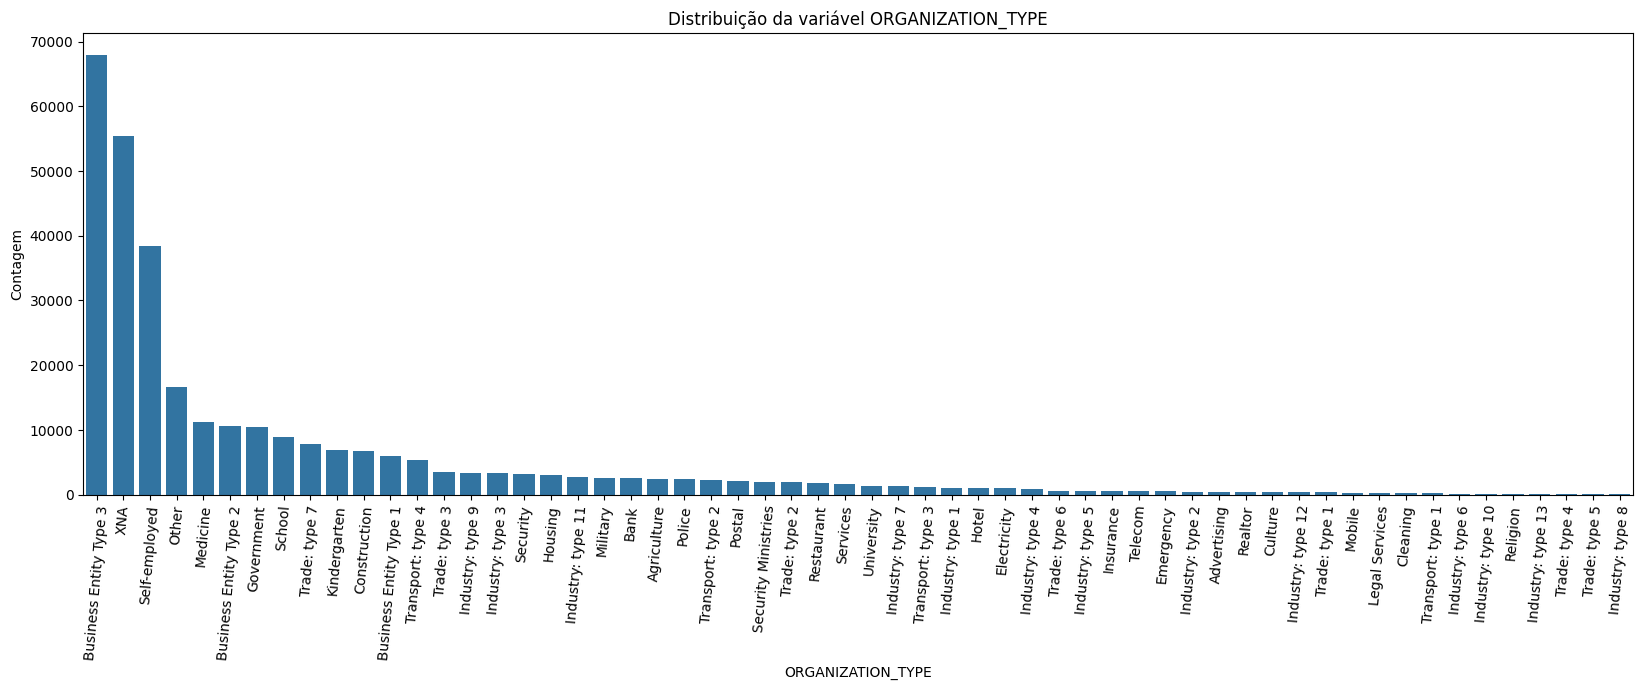

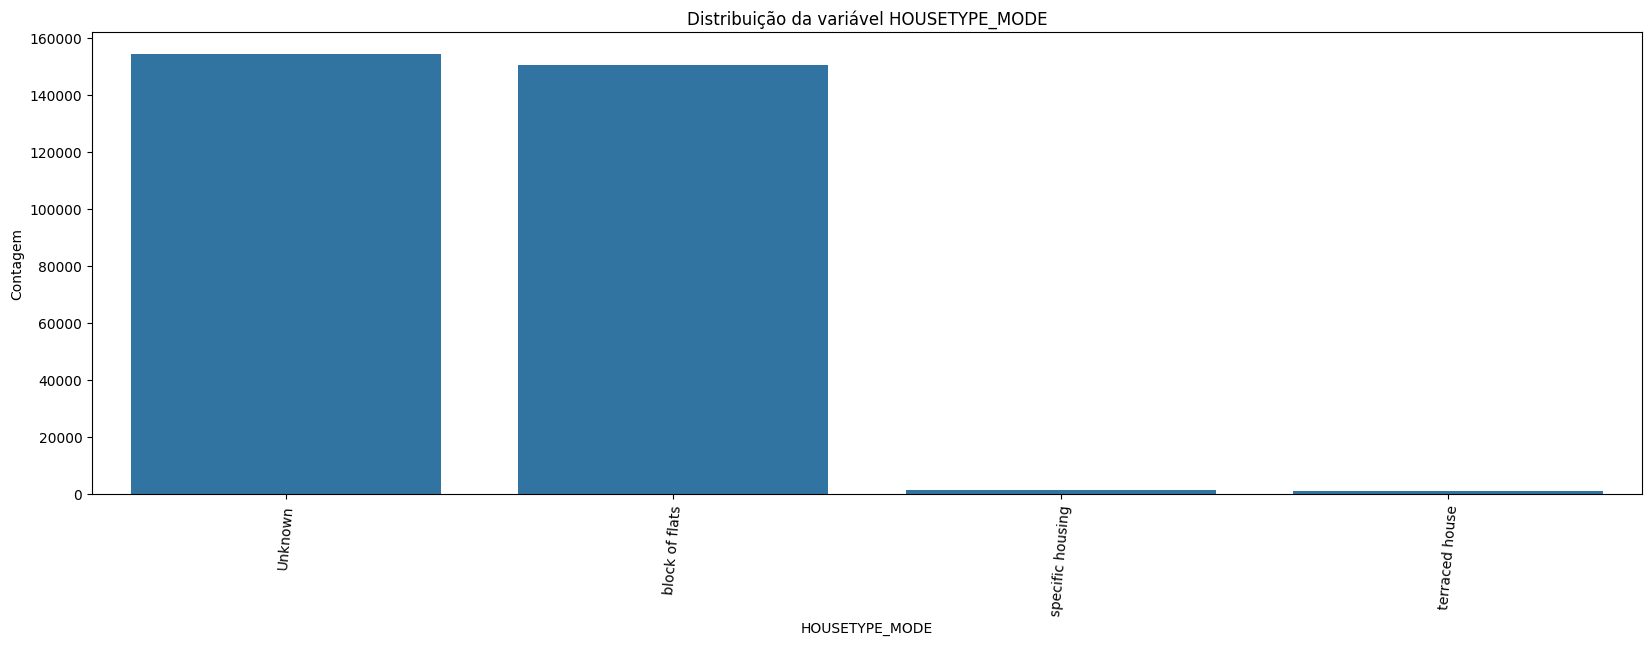

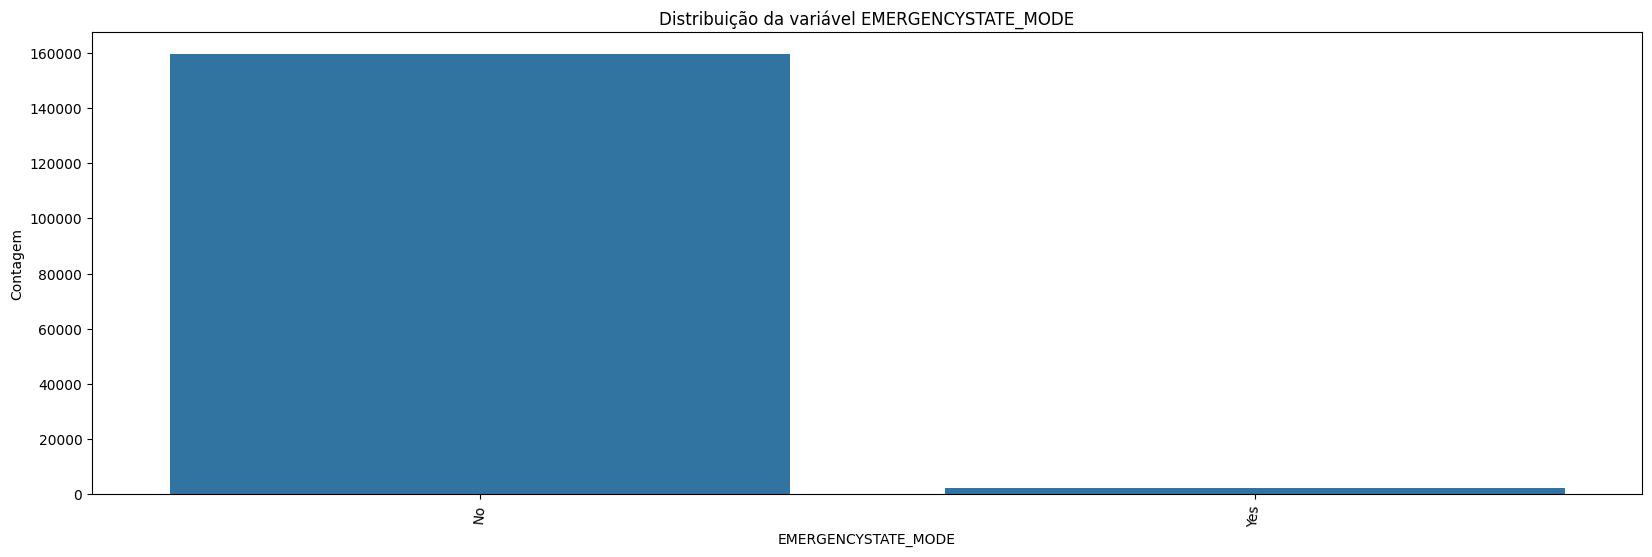

In [16]:
categorical_features = df_train.select_dtypes(include=['object']).columns

for col in categorical_features:
    plt.figure(figsize=(20,6))
    sns.countplot(x=col, data=df_train, order=df_train[col].value_counts().index)
    plt.title(f'Distribuição da variável {col}')
    plt.xlabel(col)
    plt.ylabel('Contagem')
    plt.xticks(rotation=85)
    plt.show()

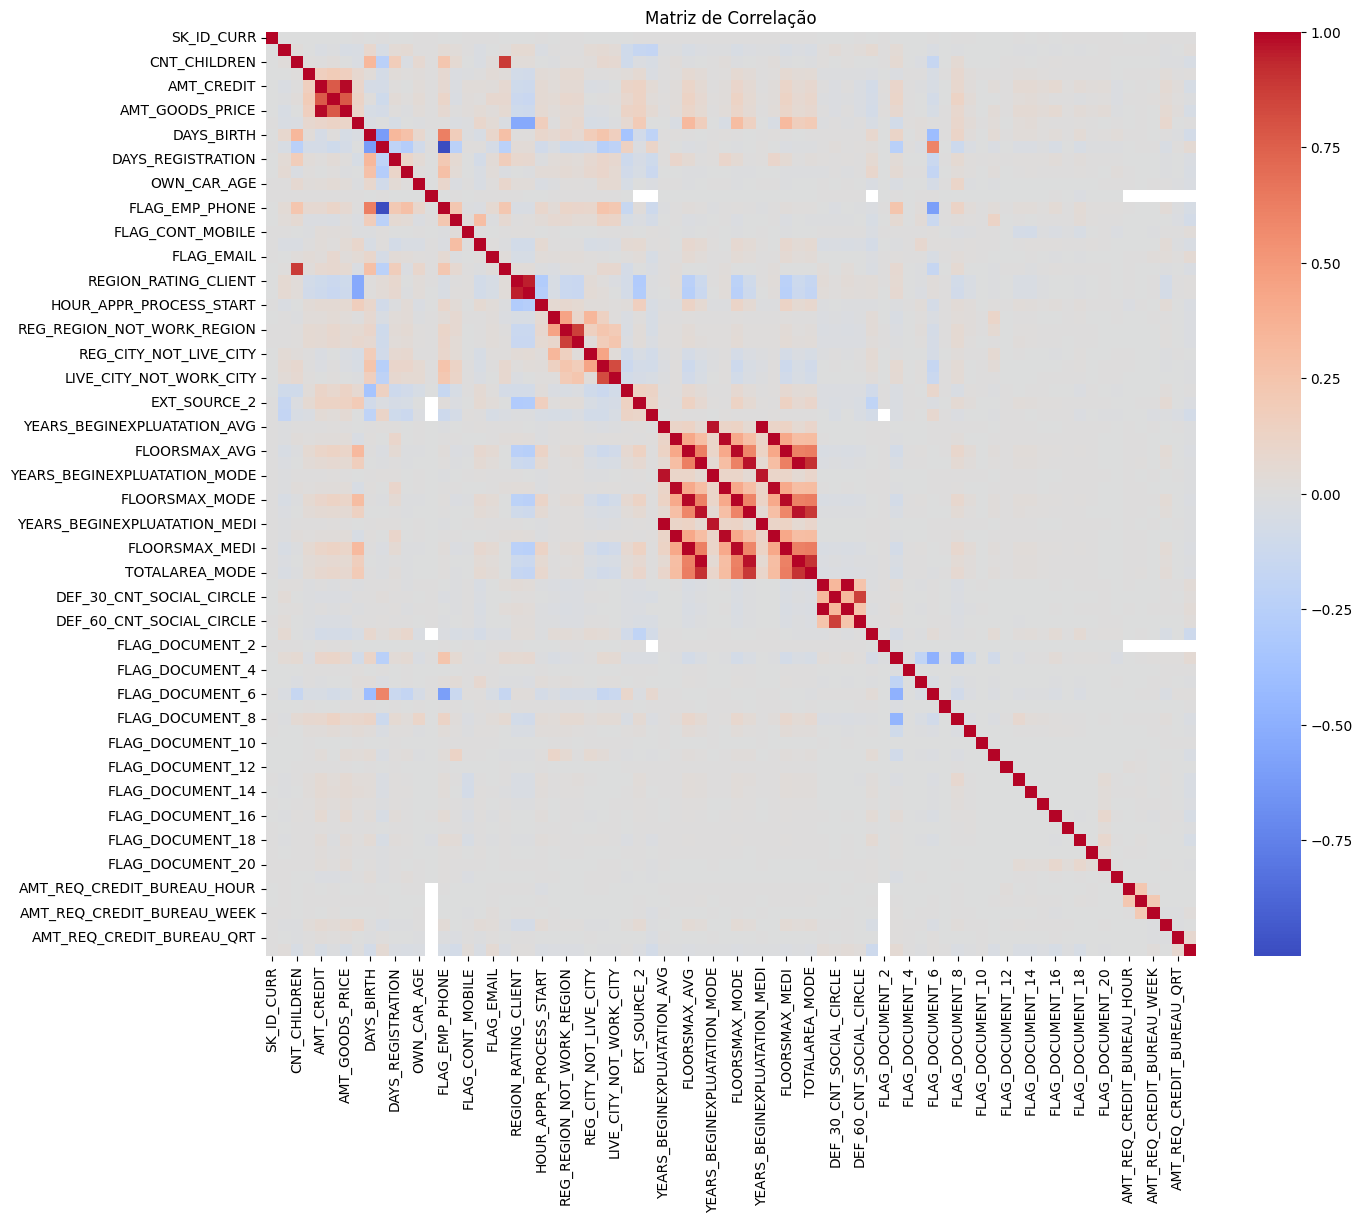

In [17]:
# verificando correlação apenas para colunas numéricas
numerical_df = df_train.select_dtypes(include=['float64', 'int64'])
corr_matrix = numerical_df.corr()

# plot
plt.figure(figsize=(15,12))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title('Matriz de Correlação')
plt.show()

In [18]:
# limite de correlação forte
limiar_correlacao = 0.8

correlacoes_fortes = corr_matrix[(corr_matrix.abs() > limiar_correlacao) & (corr_matrix.abs() < 0.99)]
pares_correlacionados = []
for i in range(correlacoes_fortes.shape[0]):
    for j in range(i):
        if abs(correlacoes_fortes.iloc[i,j]) > limiar_correlacao:
            pares_correlacionados.append((correlacoes_fortes.index[i], correlacoes_fortes.columns[j], correlacoes_fortes.iloc[i,j]))

print(f'Encontrados {len(pares_correlacionados)} pares com correlação > {limiar_correlacao}:')
for var1, var2, correlacao in pares_correlacionados:
    print(f'{var1} - {var2}: {correlacao:.2f}')

Encontrados 17 pares com correlação > 0.8:
AMT_GOODS_PRICE - AMT_CREDIT: 0.99
CNT_FAM_MEMBERS - CNT_CHILDREN: 0.88
REGION_RATING_CLIENT_W_CITY - REGION_RATING_CLIENT: 0.95
LIVE_REGION_NOT_WORK_REGION - REG_REGION_NOT_WORK_REGION: 0.86
LIVE_CITY_NOT_WORK_CITY - REG_CITY_NOT_WORK_CITY: 0.83
YEARS_BEGINEXPLUATATION_MODE - YEARS_BEGINEXPLUATATION_AVG: 0.97
YEARS_BUILD_MODE - YEARS_BUILD_AVG: 0.99
FLOORSMAX_MODE - FLOORSMAX_AVG: 0.99
LIVINGAREA_MODE - LIVINGAREA_AVG: 0.97
YEARS_BEGINEXPLUATATION_MEDI - YEARS_BEGINEXPLUATATION_MODE: 0.96
YEARS_BUILD_MEDI - YEARS_BUILD_MODE: 0.99
FLOORSMAX_MEDI - FLOORSMAX_MODE: 0.99
LIVINGAREA_MEDI - LIVINGAREA_MODE: 0.97
TOTALAREA_MODE - LIVINGAREA_AVG: 0.91
TOTALAREA_MODE - LIVINGAREA_MODE: 0.89
TOTALAREA_MODE - LIVINGAREA_MEDI: 0.91
DEF_60_CNT_SOCIAL_CIRCLE - DEF_30_CNT_SOCIAL_CIRCLE: 0.86


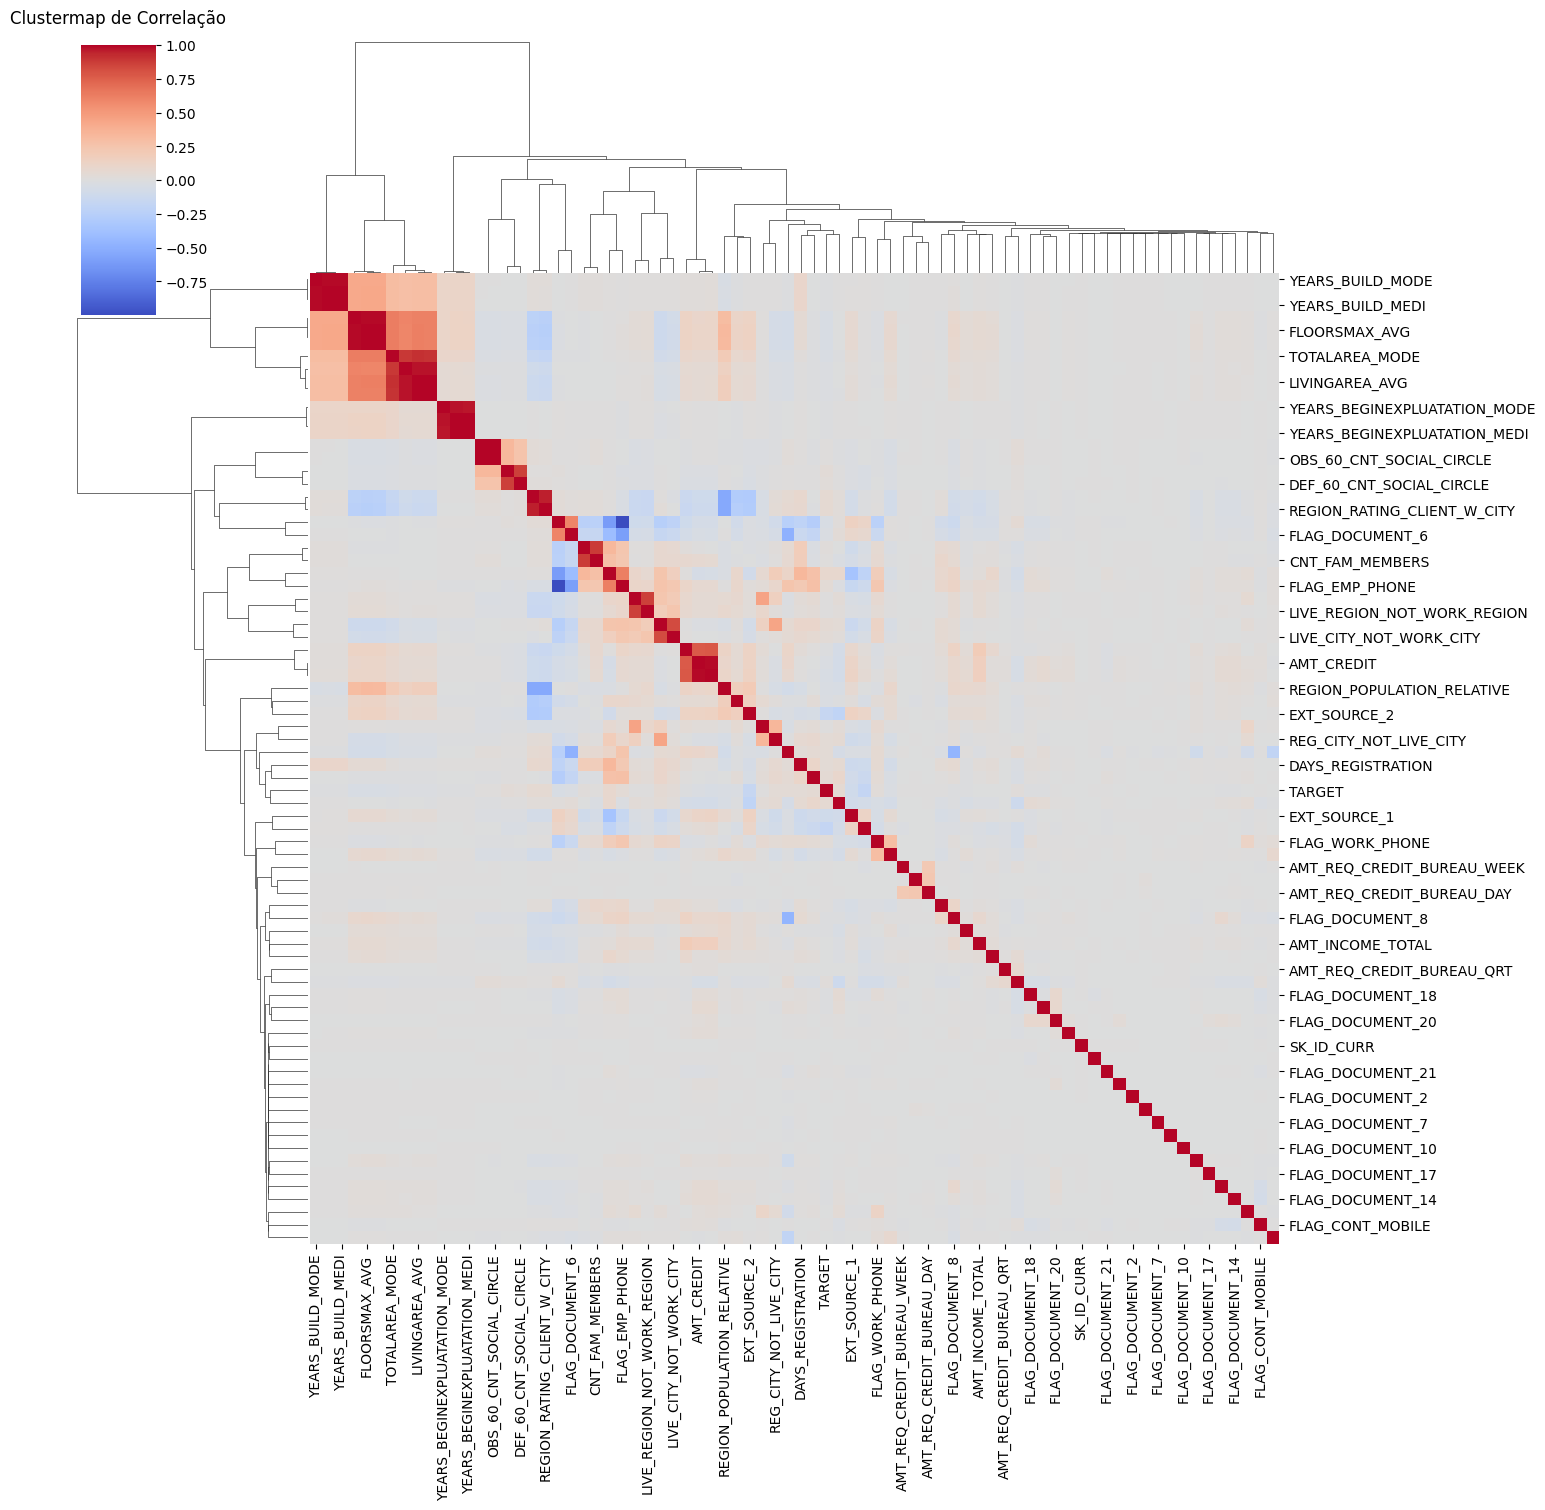

In [19]:
corr_matrix_filled = corr_matrix.fillna(0)

# cluster de correlações fortes
sns.clustermap(
    corr_matrix_filled,
    method='ward',
    cmap='coolwarm',
    figsize=(15, 15),
    center=0,
    annot=False
)
plt.title('Clustermap de Correlação', y=1.05)
plt.show()

In [20]:
# colunas altamente correlacionadas
high_corr_features = [
    'YEARS_BUILD_MODE',
    'YEARS_BUILD_MEDI',
    'FLOORSMAX_AVG',
    'TOTALAREA_MODE',
    'YEARS_BEGINEXPLUATATION_MODE',
    'YEARS_BEGINEXPLUATATION_MEDI'
]

# removendo as colunas do dataframe
df_train.drop(columns=high_corr_features, inplace=True)

print("Colunas removidas:", high_corr_features)
print("Novo shape do dataframe:", df_train.shape)

Colunas removidas: ['YEARS_BUILD_MODE', 'YEARS_BUILD_MEDI', 'FLOORSMAX_AVG', 'TOTALAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BEGINEXPLUATATION_MEDI']
Novo shape do dataframe: (307511, 84)


In [21]:
# identificar colunas com valores nulos
null_counts = df_train.isnull().sum()

# filtrando apenas colunas que têm nulos
null_counts = null_counts[null_counts > 0].sort_values(ascending=False)

print("Colunas com valores nulos:\n")
print(null_counts)


Colunas com valores nulos:

FLOORSMAX_MODE                 153020
FLOORSMAX_MEDI                 153020
YEARS_BEGINEXPLUATATION_AVG    150007
EMERGENCYSTATE_MODE            145755
OCCUPATION_TYPE                 96391
EXT_SOURCE_3                    60965
AMT_REQ_CREDIT_BUREAU_QRT       41519
AMT_REQ_CREDIT_BUREAU_YEAR      41519
AMT_REQ_CREDIT_BUREAU_WEEK      41519
AMT_REQ_CREDIT_BUREAU_DAY       41519
AMT_REQ_CREDIT_BUREAU_HOUR      41519
AMT_REQ_CREDIT_BUREAU_MON       41519
NAME_TYPE_SUITE                  1292
OBS_30_CNT_SOCIAL_CIRCLE         1021
OBS_60_CNT_SOCIAL_CIRCLE         1021
DEF_30_CNT_SOCIAL_CIRCLE         1021
DEF_60_CNT_SOCIAL_CIRCLE         1021
EXT_SOURCE_2                      660
AMT_GOODS_PRICE                   278
AMT_ANNUITY                        12
CNT_FAM_MEMBERS                     2
DAYS_LAST_PHONE_CHANGE              1
dtype: int64


In [22]:
# separando numéricas e categóricas com nulos

# lista de colunas numéricas com nulos
num_cols_with_nulls = [col for col in null_counts.index if df_train[col].dtype in ['float64', 'int64']]

# lista de colunas categóricas com nulos
cat_cols_with_nulls = [col for col in null_counts.index if df_train[col].dtype == 'object']

print("Numéricas com nulos:", num_cols_with_nulls)
print()
print("Categóricas com nulos:", cat_cols_with_nulls)


Numéricas com nulos: ['FLOORSMAX_MODE', 'FLOORSMAX_MEDI', 'YEARS_BEGINEXPLUATATION_AVG', 'EXT_SOURCE_3', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_MON', 'OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_2', 'AMT_GOODS_PRICE', 'AMT_ANNUITY', 'CNT_FAM_MEMBERS', 'DAYS_LAST_PHONE_CHANGE']

Categóricas com nulos: ['EMERGENCYSTATE_MODE', 'OCCUPATION_TYPE', 'NAME_TYPE_SUITE']


In [23]:
from sklearn.impute import SimpleImputer

# preenchendo valores numéricos com mediana
num_imputer = SimpleImputer(strategy='median')
df_train[num_cols_with_nulls] = num_imputer.fit_transform(df_train[num_cols_with_nulls])

# preenchendo valores categóricos com o valor mais frequente
cat_imputer = SimpleImputer(strategy='most_frequent')
df_train[cat_cols_with_nulls] = cat_imputer.fit_transform(df_train[cat_cols_with_nulls])

print("Preenchimento de nulos finalizado!")
print("Total de valores nulos restantes:", df_train.isnull().sum().sum())

Preenchimento de nulos finalizado!
Total de valores nulos restantes: 0


## Feature Engeneering

| Nova Feature                          | Formula para criar                     | Por que pode ser útil?                          |
|---------------------------------------|----------------------------------------|-------------------------------------------------|
| Renda por pessoa                     | AMT_INCOME_TOTAL / CNT_FAM_MEMBERS   | Mede a renda individual média                   |
| Anos de Emprego                       | DAYS_EMPLOYED / 365                | Traz experiência no mercado                    |
| Idade do Cliente                      | DAYS_BIRTH / -365                    | Idade real (positiva)                          |
| Dias desde última mudança de telefone | DAYS_LAST_PHONE_CHANGE / -365        | Pode indicar estabilidade                      |
| Relação entre valor do bem e da renda | AMT_GOODS_PRICE / AMT_INCOME_TOTAL   | Capacidade de compra                           |
| Diferença entre idade e tempo de emprego | AGE_YEARS - YEARS_EMPLOYED                   | Ajuda a identificar tempo fora do mercado de trabalho            |
| Relação entre crédito e renda         | AMT_CREDIT / AMT_INCOME_TOTAL               | Mostra quanto do crédito solicitado compromete a renda           |
| Relação entre anuidade e renda        | AMT_ANNUITY / AMT_INCOME_TOTAL              | Mede o peso das parcelas na renda do cliente         

In [41]:
# renda individual 
df_train['INCOME_PER_PERSON'] = df_train['AMT_INCOME_TOTAL'] / df_train['CNT_FAM_MEMBERS']
# anos de emprego
# corrigir o placeholder antes de converter para anos
df_train['DAYS_EMPLOYED'].replace(365243, np.nan, inplace=True)
df_train['YEARS_EMPLOYED'] = df_train['DAYS_EMPLOYED'] / -365
# idade do cliente
df_train['AGE_YEARS'] = df_train['DAYS_BIRTH'] / -365
# dias desde a última mudança de telefone
df_train['YEARS_LAST_PHONE_CHANGE'] = df_train['DAYS_LAST_PHONE_CHANGE'] / -365
# relação valor do bem pela renda
df_train['GOODS_INCOME_RATIO'] = df_train['AMT_GOODS_PRICE'] / df_train['AMT_INCOME_TOTAL']
# diferença entreidade e tempo empregado
df_train['EMPLOYED_AGE_DIFF'] = df_train['AGE_YEARS'] - df_train['YEARS_EMPLOYED']
# credito solicitado sobre renda
df_train['CREDIT_INCOME_RATIO'] = df_train['AMT_CREDIT'] / df_train['AMT_INCOME_TOTAL']
# anuidade proporcional a renda
df_train['ANNUITY_INCOME_RATIO'] = df_train['AMT_ANNUITY'] / df_train['AMT_INCOME_TOTAL']


df_train.sort_values(by='INCOME_PER_PERSON').reset_index().head(15)


C:\Users\mathe\AppData\Local\Temp\ipykernel_12608\4204152796.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['DAYS_EMPLOYED'].replace(365243, np.nan, inplace=True)


index  SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0   183878      313127       0         Cash loans           F            Y   
1   267998      410527       0         Cash loans           F            N   
2   294741      441465       0         Cash loans           F            Y   
3   300538      448179       1         Cash loans           F            N   
4   155369      280108       0         Cash loans           F            N   
5   132585      253779       0         Cash loans           F            N   
6   186820      316580       0         Cash loans           F            N   
7   245243      383830       0         Cash loans           F            N   
8   265784      407877       0         Cash loans           F            N   
9   162388      288254       0         Cash loans           F            Y   
10   84209      197689       0         Cash loans           M            N   
11  146748      270144       0         Cash loans           F            N   
12   75008      186992       0         Cash loans           M            N   
13  262748      404212       0         Cash loans           F            N   
14   83674      197045       0         Cash loans           F            N   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  ...  \
0                N            14           45000.0    810000.0  ...   
1                N            14           54000.0    604152.0  ...   
2                Y             4           29250.0    101880.0  ...   
3                Y             5           36000.0    351000.0  ...   
4                Y            19          112500.0    269550.0  ...   
5                Y            10           67500.0     92655.0  ...   
6                Y            10           67500.0    117162.0  ...   
7                Y             6           45000.0    113760.0  ...   
8                Y            19          112500.0    135000.0  ...   
9                Y             4           36000.0    143910.0  ...   
10               Y             3           31500.0     98910.0  ...   
11               Y             3           31500.0    808650.0  ...   
12               Y             3           32850.0    276277.5  ...   
13               N             2           26550.0    101880.0  ...   
14               N             2           27000.0    269550.0  ...   

    AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR INCOME_PER_PERSON  \
0                         0.0                         1.0       2812.500000   
1                         0.0                         2.0       3375.000000   
2                         0.0                         0.0       4875.000000   
3                         0.0                         2.0       5142.857143   
4                         0.0                         4.0       5625.000000   
5                         0.0                         2.0       5625.000000   
6                         0.0                         1.0       5625.000000   
7                         0.0                         0.0       5625.000000   
8                         0.0                         2.0       5625.000000   
9                         0.0                         1.0       6000.000000   
10                        0.0                         1.0       6300.000000   
11                        0.0                         0.0       6300.000000   
12                        0.0                         1.0       6570.000000   
13                        0.0                         1.0       6637.500000   
14                        0.0                         1.0       6750.000000   

   YEARS_EMPLOYED  AGE_YEARS YEARS_LAST_PHONE_CHANGE GOODS_INCOME_RATIO  \
0             NaN  55.638356                4.890411          18.000000   
1        1.479452  42.364384                0.841096          10.000000   
2        1.761644  40.312329                0.917808           3.076923   
3        4.046575  29.468493                0.893151  

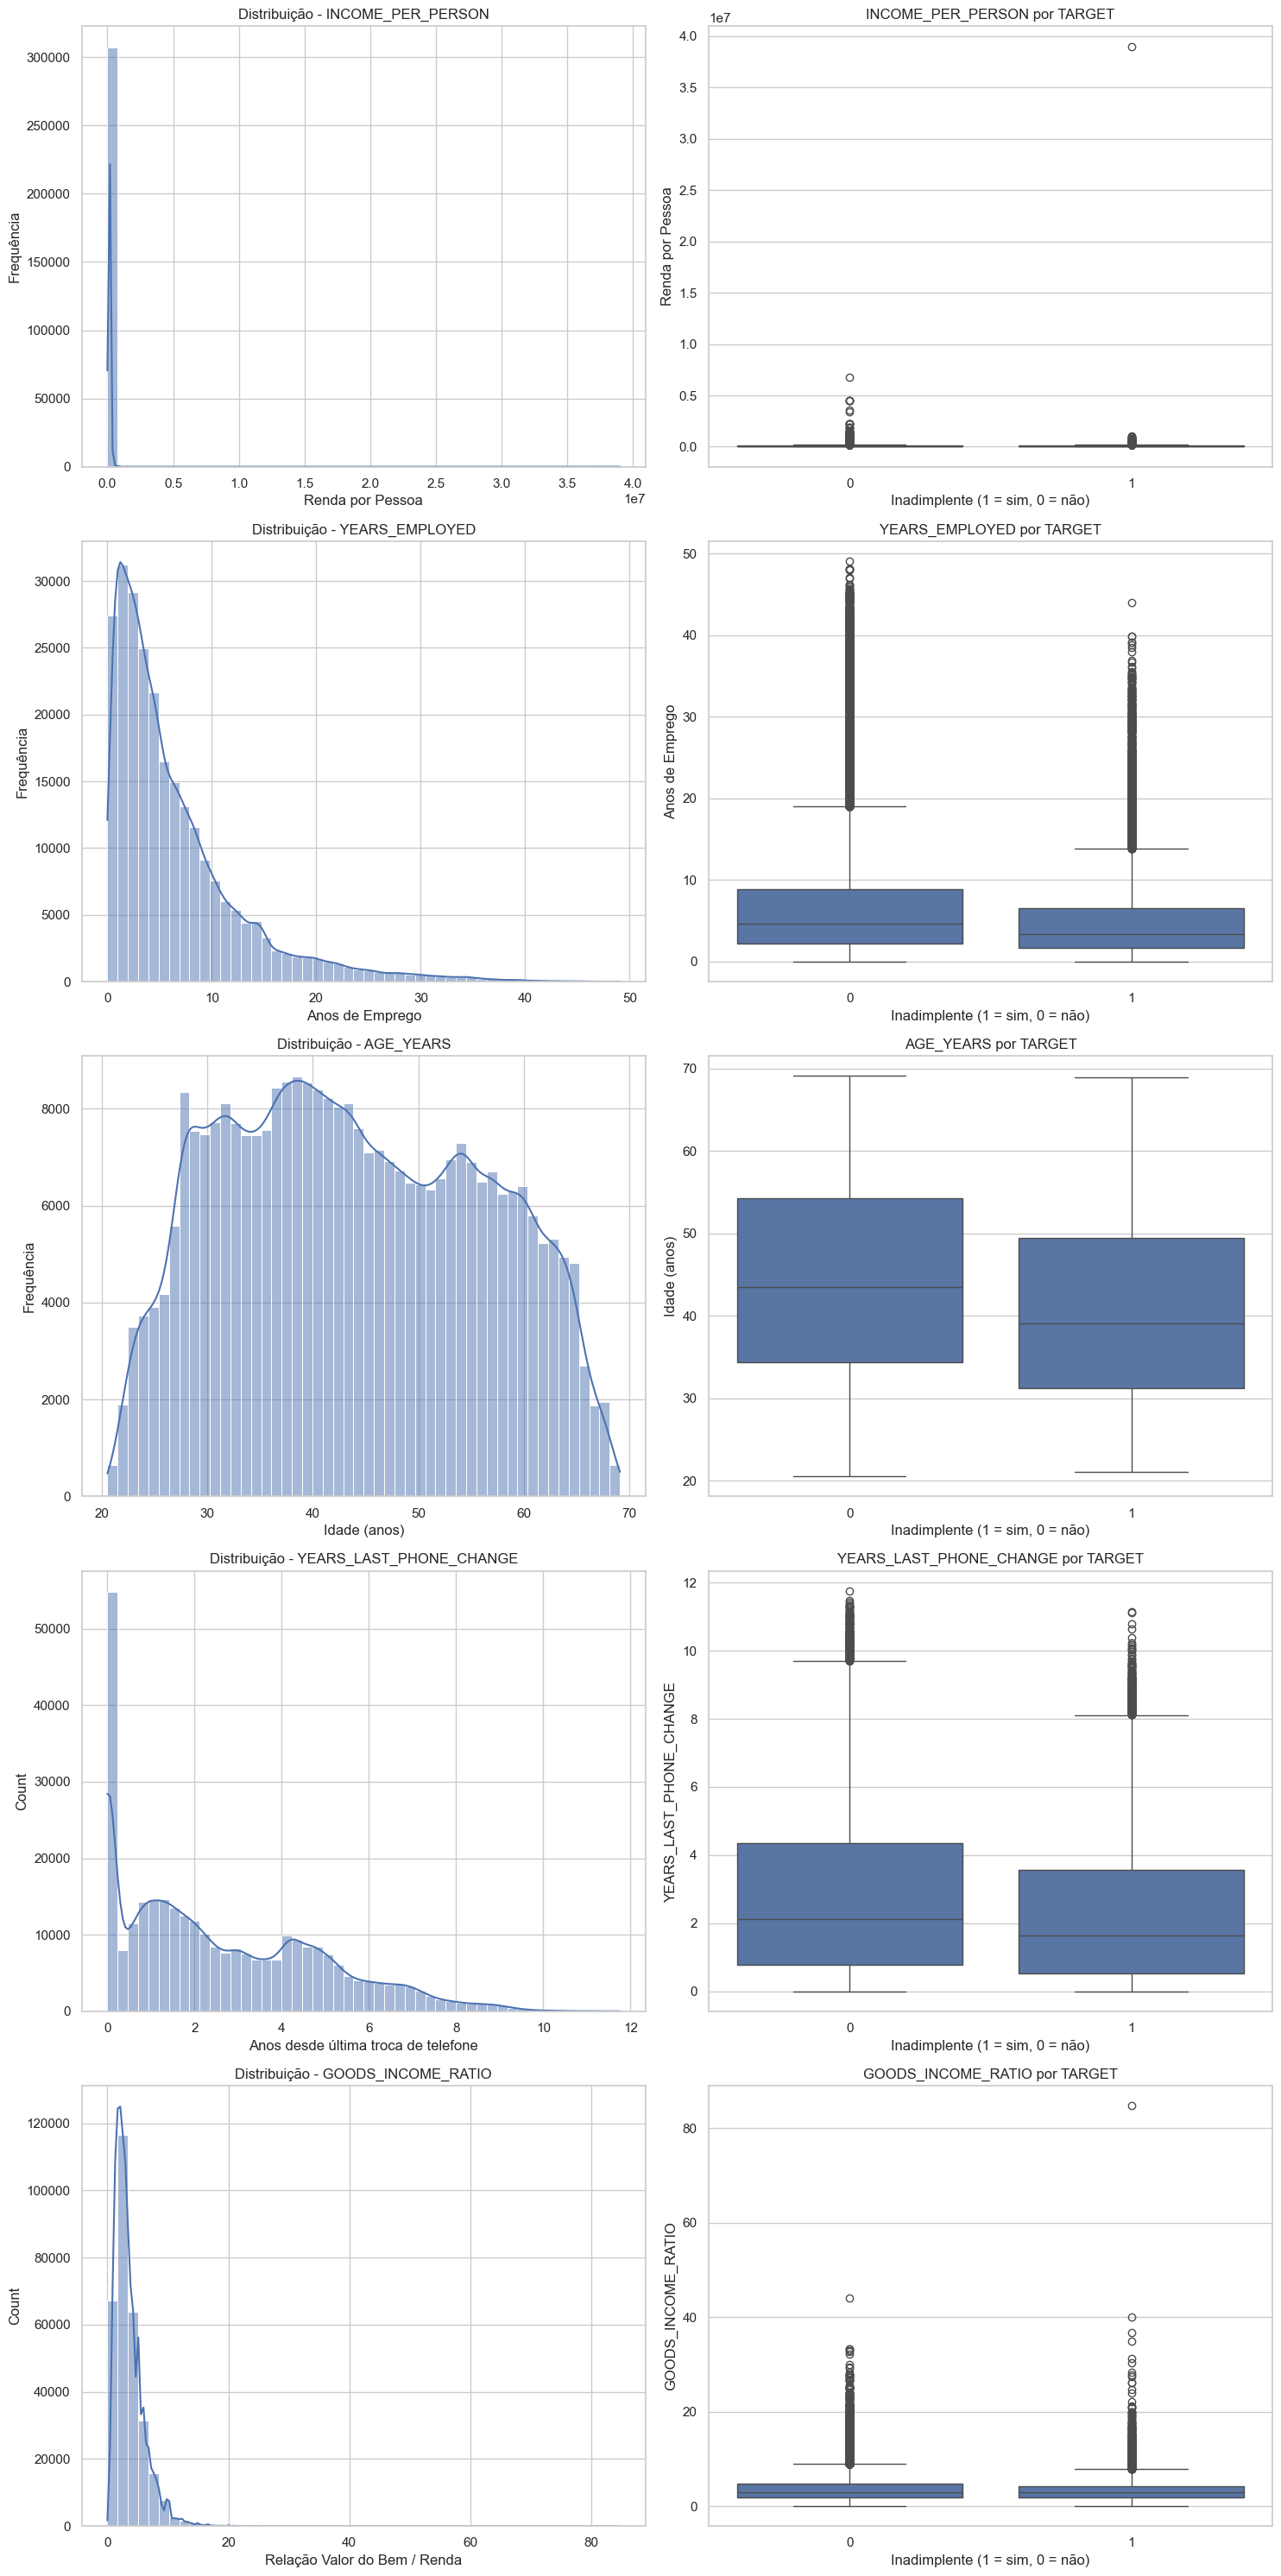

In [37]:
sns.set(style="whitegrid")
plt.figure(figsize=(15, 30))

# INCOME_PER_PERSON
plt.subplot(5, 2, 1)
sns.histplot(df_train['INCOME_PER_PERSON'], bins=50, kde=True)
plt.title('Distribuição - INCOME_PER_PERSON')
plt.xlabel('Renda por Pessoa')
plt.ylabel('Frequência')

plt.subplot(5, 2, 2)
sns.boxplot(x='TARGET', y='INCOME_PER_PERSON', data=df_train)
plt.title('INCOME_PER_PERSON por TARGET')
plt.xlabel('Inadimplente (1 = sim, 0 = não)')
plt.ylabel('Renda por Pessoa')

# YEARS_EMPLOYED
plt.subplot(5, 2, 3)
sns.histplot(df_train['YEARS_EMPLOYED'], bins=50, kde=True)
plt.title('Distribuição - YEARS_EMPLOYED')
plt.xlabel('Anos de Emprego')
plt.ylabel('Frequência')

plt.subplot(5, 2, 4)
sns.boxplot(x='TARGET', y='YEARS_EMPLOYED', data=df_train)
plt.title('YEARS_EMPLOYED por TARGET')
plt.xlabel('Inadimplente (1 = sim, 0 = não)')
plt.ylabel('Anos de Emprego')


# AGE_YEARS
plt.subplot(5, 2, 5)
sns.histplot(df_train['AGE_YEARS'], bins=50, kde=True)
plt.title('Distribuição - AGE_YEARS')
plt.xlabel('Idade (anos)')
plt.ylabel('Frequência')

plt.subplot(5, 2, 6)
sns.boxplot(x='TARGET', y='AGE_YEARS', data=df_train)
plt.title('AGE_YEARS por TARGET')
plt.xlabel('Inadimplente (1 = sim, 0 = não)')
plt.ylabel('Idade (anos)')

# YEARS_LAST_PHONE_CHANGE
plt.subplot(5, 2, 7)
sns.histplot(df_train['YEARS_LAST_PHONE_CHANGE'], bins=50, kde=True)
plt.title('Distribuição - YEARS_LAST_PHONE_CHANGE')
plt.xlabel('Anos desde última troca de telefone')

plt.subplot(5, 2, 8)
sns.boxplot(x='TARGET', y='YEARS_LAST_PHONE_CHANGE', data=df_train)
plt.title('YEARS_LAST_PHONE_CHANGE por TARGET')
plt.xlabel('Inadimplente (1 = sim, 0 = não)')

# GOODS_INCOME_RATIO
plt.subplot(5, 2, 9)
sns.histplot(df_train['GOODS_INCOME_RATIO'], bins=50, kde=True)
plt.title('Distribuição - GOODS_INCOME_RATIO')
plt.xlabel('Relação Valor do Bem / Renda')

plt.subplot(5, 2, 10)
sns.boxplot(x='TARGET', y='GOODS_INCOME_RATIO', data=df_train)
plt.title('GOODS_INCOME_RATIO por TARGET')
plt.xlabel('Inadimplente (1 = sim, 0 = não)')

plt.tight_layout()
plt.show()


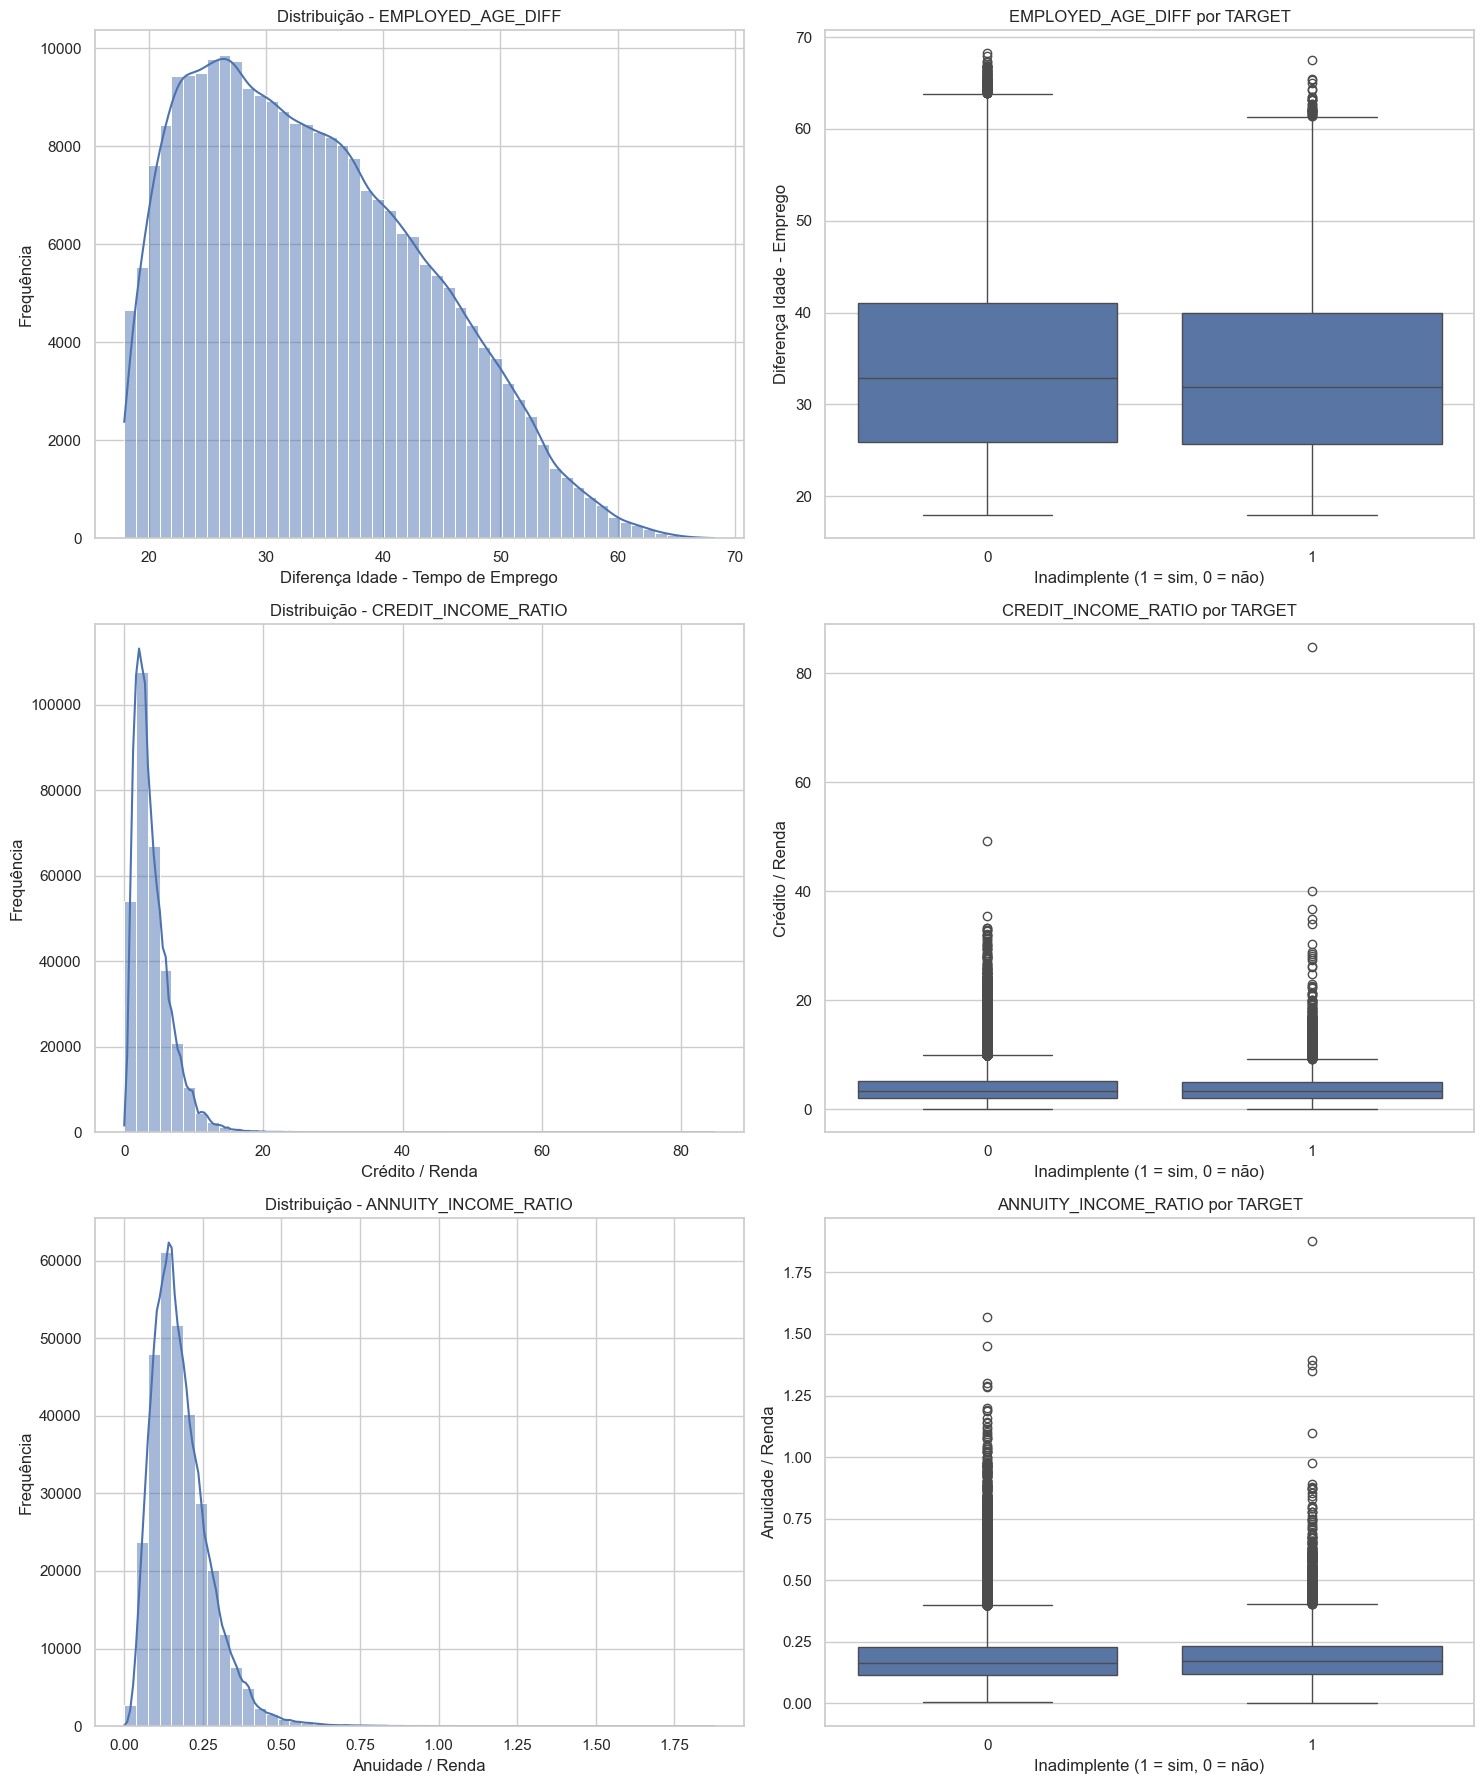

In [42]:
plt.figure(figsize=(15, 18))

# EMPLOYED_AGE_DIFF
plt.subplot(3, 2, 1)
sns.histplot(df_train['EMPLOYED_AGE_DIFF'], bins=50, kde=True)
plt.title('Distribuição - EMPLOYED_AGE_DIFF')
plt.xlabel('Diferença Idade - Tempo de Emprego')
plt.ylabel('Frequência')

plt.subplot(3, 2, 2)
sns.boxplot(x='TARGET', y='EMPLOYED_AGE_DIFF', data=df_train)
plt.title('EMPLOYED_AGE_DIFF por TARGET')
plt.xlabel('Inadimplente (1 = sim, 0 = não)')
plt.ylabel('Diferença Idade - Emprego')


# CREDIT_INCOME_RATIO
plt.subplot(3, 2, 3)
sns.histplot(df_train['CREDIT_INCOME_RATIO'], bins=50, kde=True)
plt.title('Distribuição - CREDIT_INCOME_RATIO')
plt.xlabel('Crédito / Renda')
plt.ylabel('Frequência')

plt.subplot(3, 2, 4)
sns.boxplot(x='TARGET', y='CREDIT_INCOME_RATIO', data=df_train)
plt.title('CREDIT_INCOME_RATIO por TARGET')
plt.xlabel('Inadimplente (1 = sim, 0 = não)')
plt.ylabel('Crédito / Renda')


# ANNUITY_INCOME_RATIO
plt.subplot(3, 2, 5)
sns.histplot(df_train['ANNUITY_INCOME_RATIO'], bins=50, kde=True)
plt.title('Distribuição - ANNUITY_INCOME_RATIO')
plt.xlabel('Anuidade / Renda')
plt.ylabel('Frequência')

plt.subplot(3, 2, 6)
sns.boxplot(x='TARGET', y='ANNUITY_INCOME_RATIO', data=df_train)
plt.title('ANNUITY_INCOME_RATIO por TARGET')
plt.xlabel('Inadimplente (1 = sim, 0 = não)')
plt.ylabel('Anuidade / Renda')


plt.tight_layout()
plt.show()


Variaveis categoricas

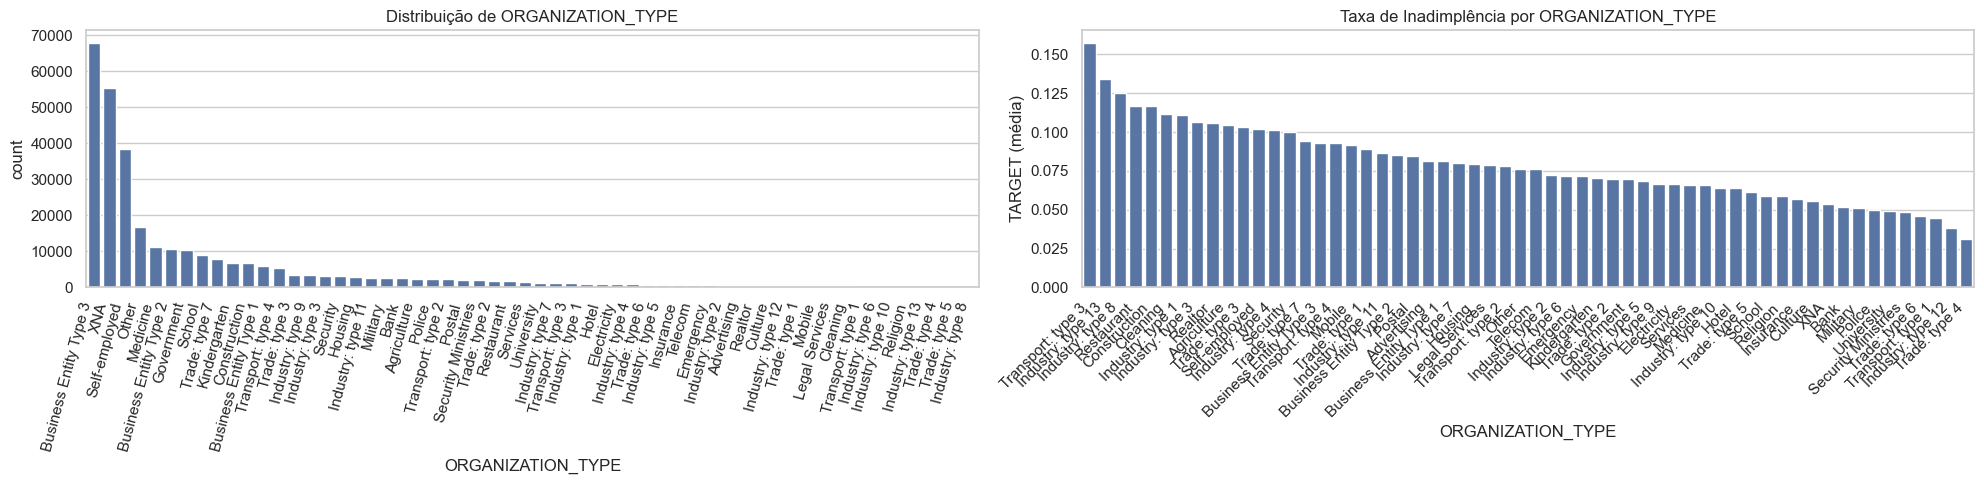


 Análise da variável: ORGANIZATION_TYPE
As categorias com maior taxa de inadimplência são:
ORGANIZATION_TYPE
Transport: type 3    0.157540
Industry: type 13    0.134328
Industry: type 8     0.125000
Name: TARGET, dtype: float64
------------------------------------------------------------


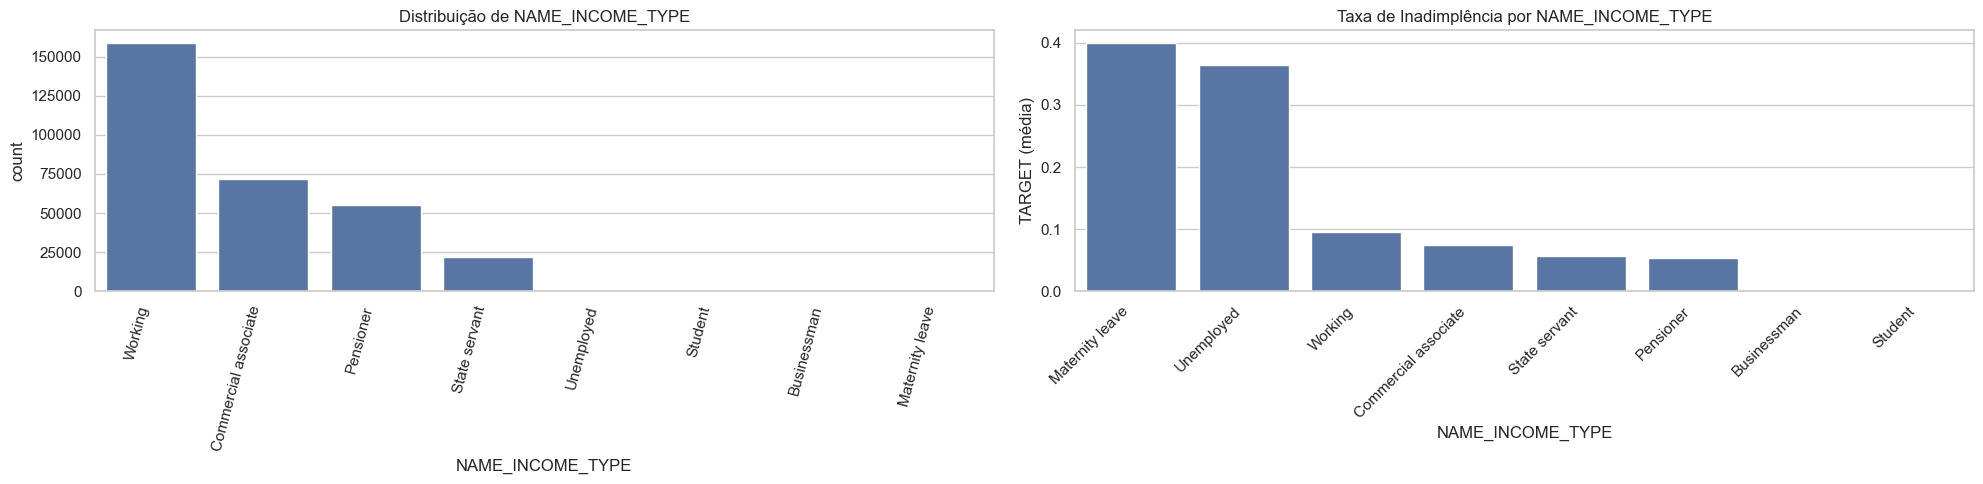


 Análise da variável: NAME_INCOME_TYPE
As categorias com maior taxa de inadimplência são:
NAME_INCOME_TYPE
Maternity leave    0.400000
Unemployed         0.363636
Working            0.095885
Name: TARGET, dtype: float64
------------------------------------------------------------


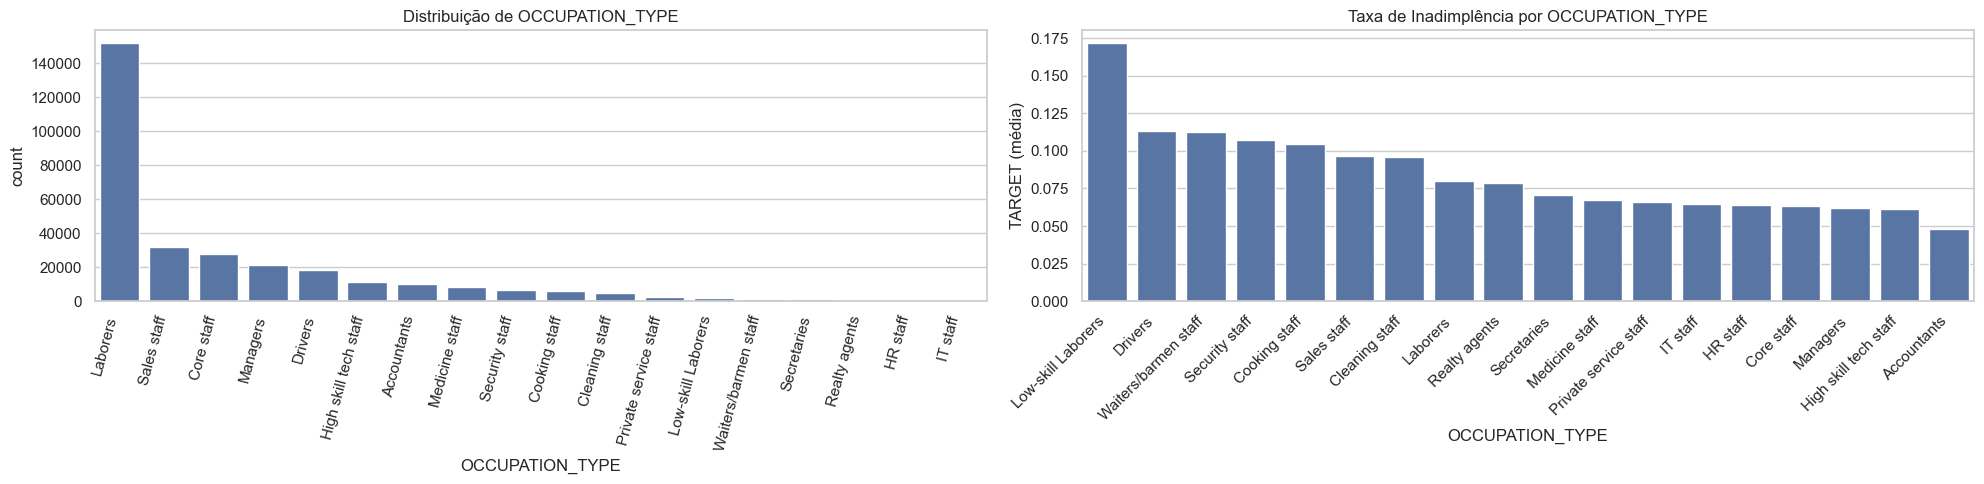


 Análise da variável: OCCUPATION_TYPE
As categorias com maior taxa de inadimplência são:
OCCUPATION_TYPE
Low-skill Laborers      0.171524
Drivers                 0.113261
Waiters/barmen staff    0.112760
Name: TARGET, dtype: float64
------------------------------------------------------------


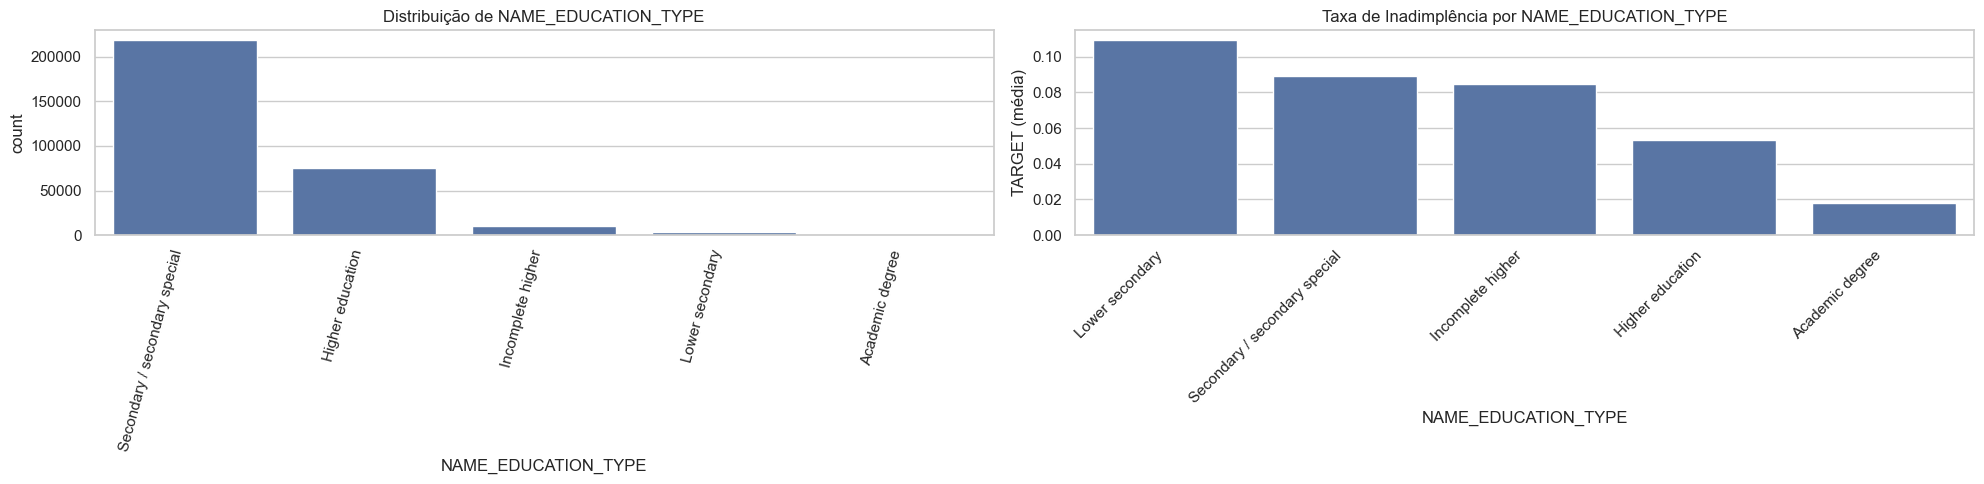


 Análise da variável: NAME_EDUCATION_TYPE
As categorias com maior taxa de inadimplência são:
NAME_EDUCATION_TYPE
Lower secondary                  0.109277
Secondary / secondary special    0.089399
Incomplete higher                0.084850
Name: TARGET, dtype: float64
------------------------------------------------------------


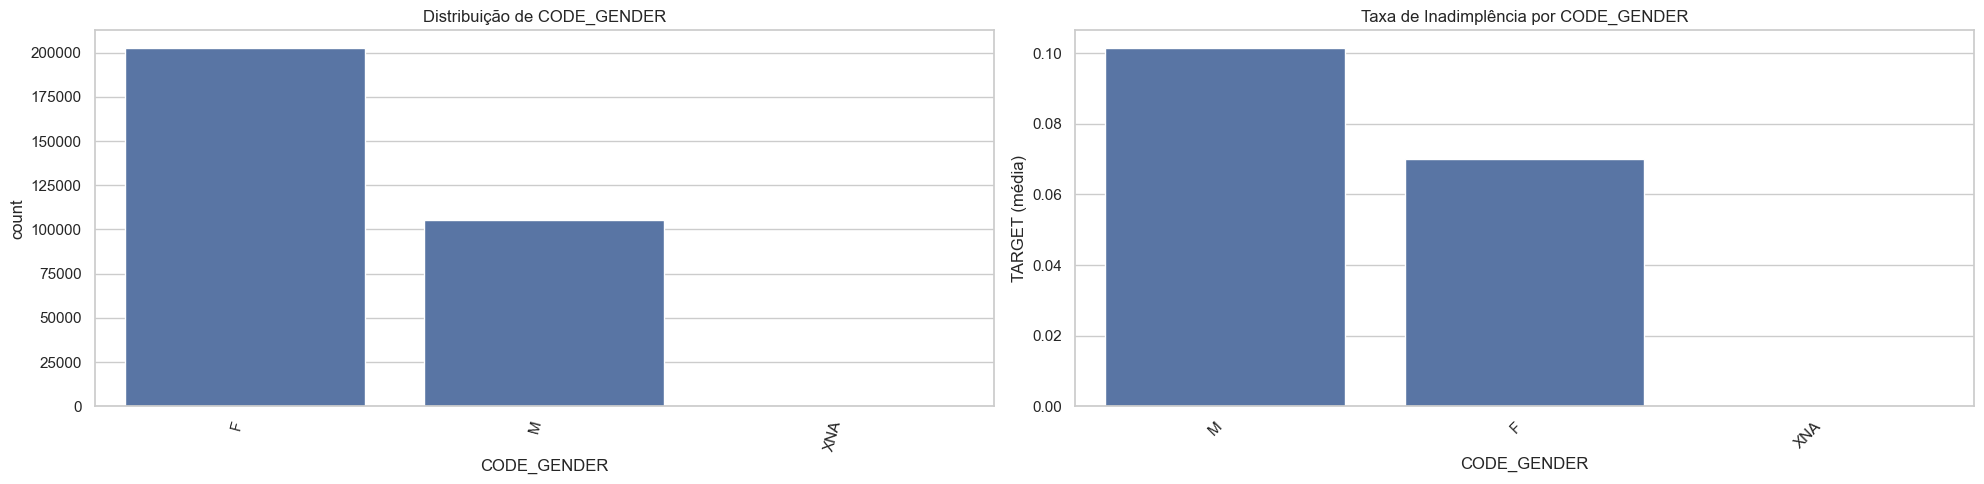


 Análise da variável: CODE_GENDER
As categorias com maior taxa de inadimplência são:
CODE_GENDER
M      0.101419
F      0.069993
XNA    0.000000
Name: TARGET, dtype: float64
------------------------------------------------------------


In [47]:
from sklearn.feature_selection import mutual_info_classif
categorical_cols = df_train.select_dtypes(include='object').columns.tolist()

# Calculando a mutual information
X = df_train[categorical_cols]
y = df_train['TARGET']

# Transformar categorias em números
X_encoded = X.apply(lambda col: col.astype('category').cat.codes)

mi_scores = mutual_info_classif(X_encoded, y, discrete_features=True)
mi_scores = pd.Series(mi_scores, index=categorical_cols)
mi_scores = mi_scores.sort_values(ascending=False)

top_categoricals = mi_scores.head(5).index.tolist()

# isualização e interpretação
sns.set(style="whitegrid")
for col in top_categoricals:
    plt.figure(figsize=(20, 5))

    # Grafico de contagem
    plt.subplot(1, 2, 1)
    sns.countplot(x=col, data=df_train, order=df_train[col].value_counts().index)
    plt.title(f'Distribuição de {col}')
    plt.xticks(rotation=75, ha='right')

    # Taxa de inadimplência por categoria
    plt.subplot(1, 2, 2)
    target_rate = df_train.groupby(col)['TARGET'].mean().sort_values(ascending=False)
    sns.barplot(x=target_rate.index, y=target_rate.values)
    plt.title(f'Taxa de Inadimplência por {col}')
    plt.ylabel('TARGET (média)')
    plt.xticks(rotation=45, ha='right')

    plt.tight_layout()
    plt.show()

    print(f"\n Análise da variável: {col}")
    print(f"As categorias com maior taxa de inadimplência são:\n{target_rate.head(3)}")
    print("-" * 60)


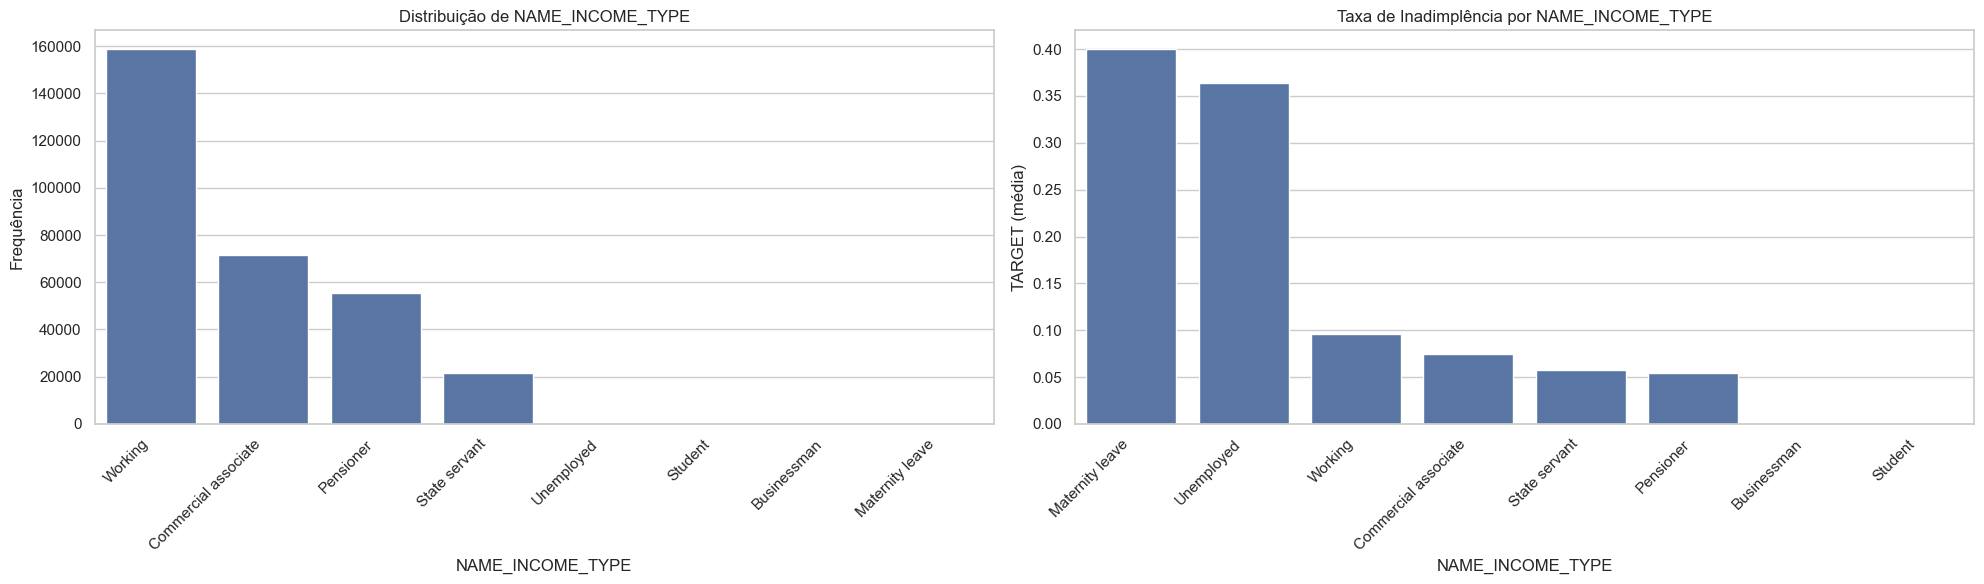


Análise da variável: NAME_INCOME_TYPE
As categorias com maior taxa de inadimplência são:
NAME_INCOME_TYPE
Maternity leave    0.400000
Unemployed         0.363636
Working            0.095885
Name: TARGET, dtype: float64
----------------------------------------------------------------------


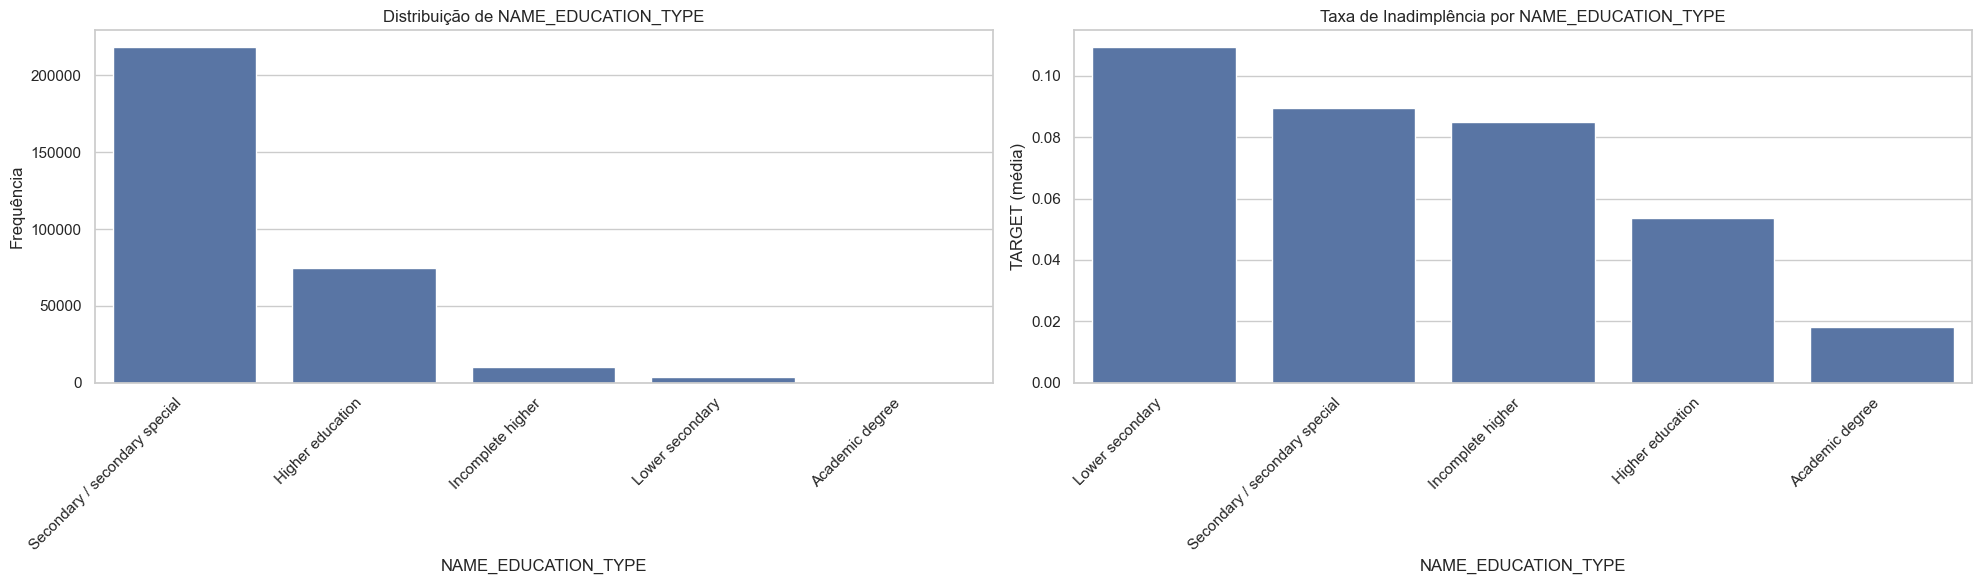


Análise da variável: NAME_EDUCATION_TYPE
As categorias com maior taxa de inadimplência são:
NAME_EDUCATION_TYPE
Lower secondary                  0.109277
Secondary / secondary special    0.089399
Incomplete higher                0.084850
Name: TARGET, dtype: float64
----------------------------------------------------------------------


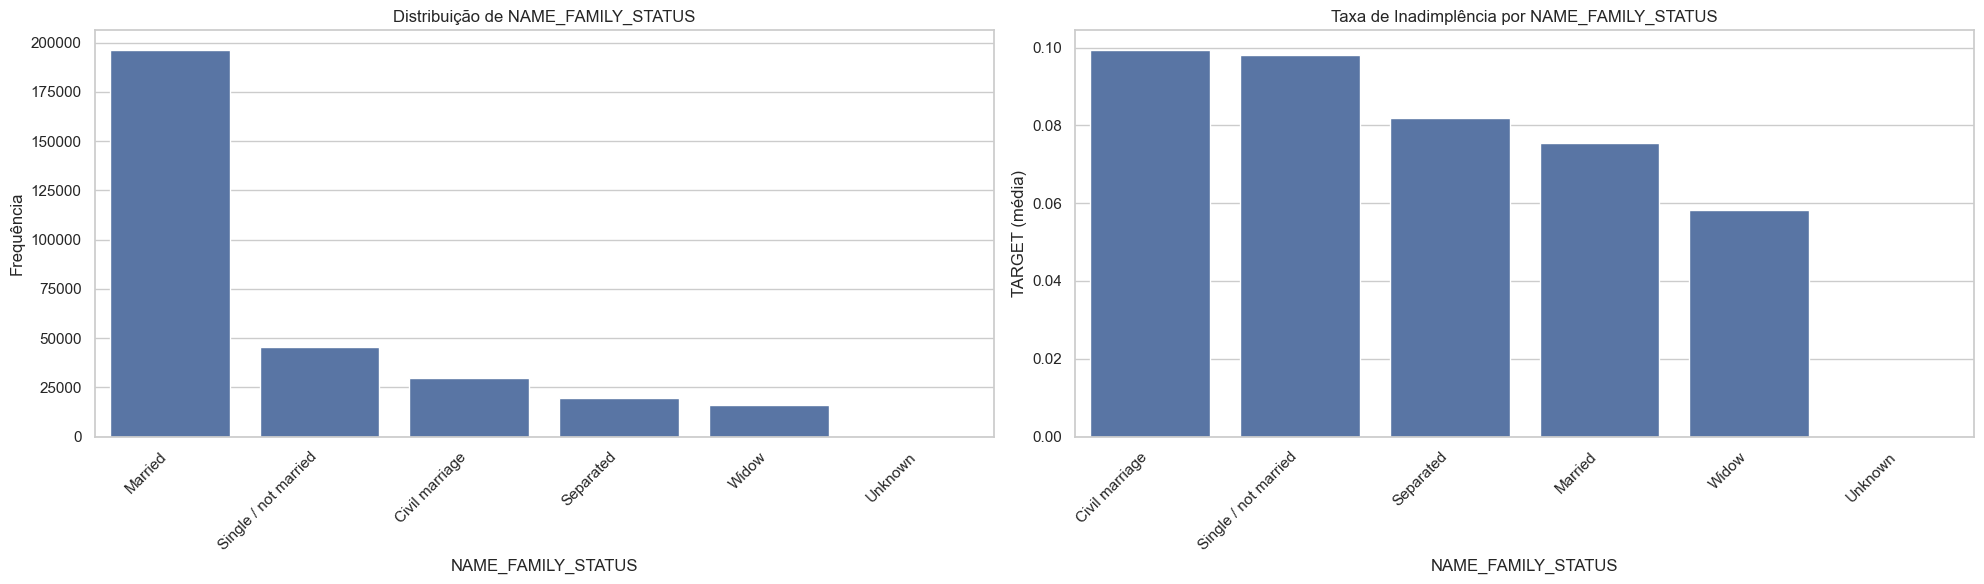


Análise da variável: NAME_FAMILY_STATUS
As categorias com maior taxa de inadimplência são:
NAME_FAMILY_STATUS
Civil marriage          0.099446
Single / not married    0.098077
Separated               0.081942
Name: TARGET, dtype: float64
----------------------------------------------------------------------


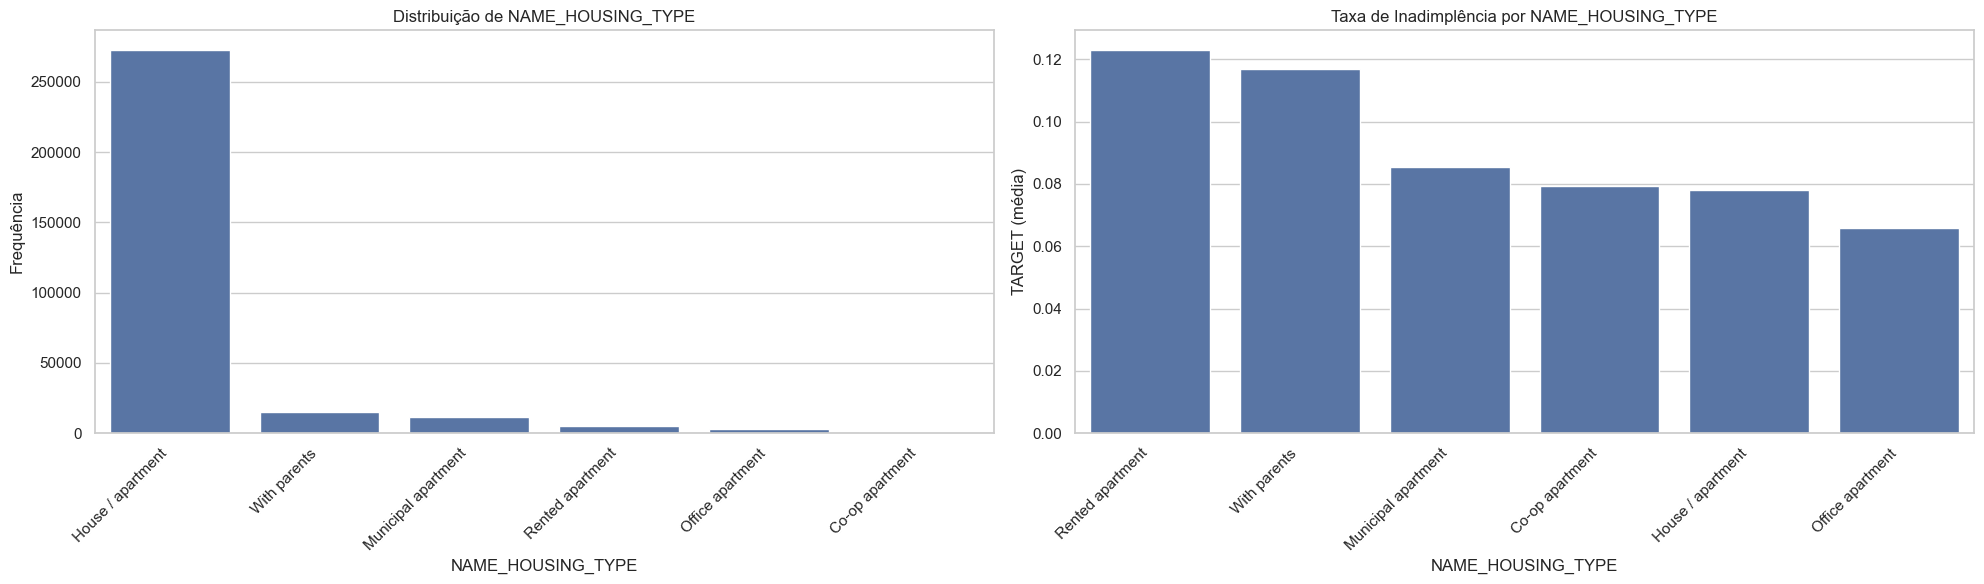


Análise da variável: NAME_HOUSING_TYPE
As categorias com maior taxa de inadimplência são:
NAME_HOUSING_TYPE
Rented apartment       0.123131
With parents           0.116981
Municipal apartment    0.085397
Name: TARGET, dtype: float64
----------------------------------------------------------------------


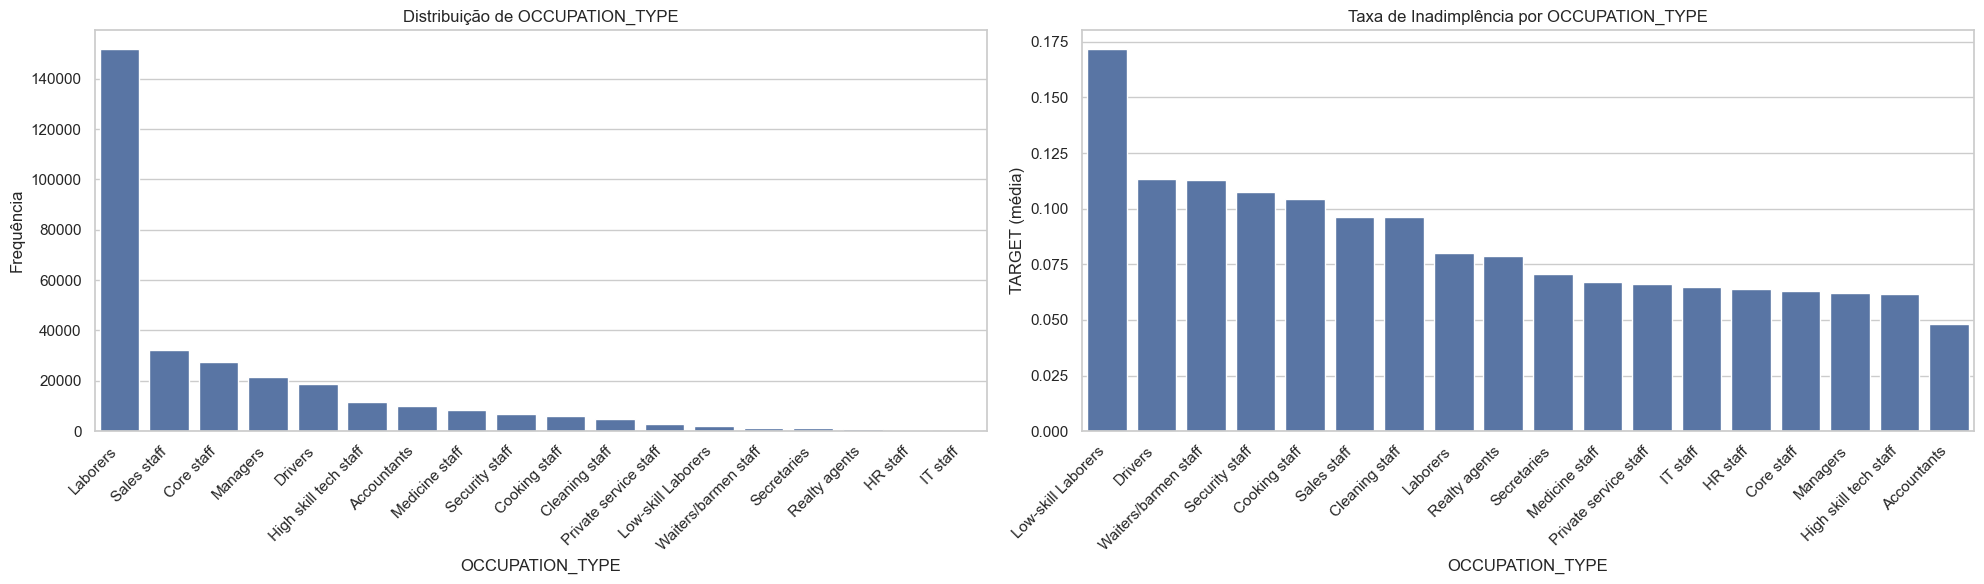


Análise da variável: OCCUPATION_TYPE
As categorias com maior taxa de inadimplência são:
OCCUPATION_TYPE
Low-skill Laborers      0.171524
Drivers                 0.113261
Waiters/barmen staff    0.112760
Name: TARGET, dtype: float64
----------------------------------------------------------------------


In [52]:
sns.set(style="whitegrid")

categorical_vars = [
    'NAME_INCOME_TYPE',
    'NAME_EDUCATION_TYPE',
    'NAME_FAMILY_STATUS',
    'NAME_HOUSING_TYPE',
    'OCCUPATION_TYPE'
]

for var in categorical_vars:
    plt.figure(figsize=(20, 6))

    # Gráfico de distribuição
    plt.subplot(1, 2, 1)
    order = df_train[var].value_counts().index
    sns.countplot(data=df_train, x=var, order=order)
    plt.xticks(rotation=45, ha='right')
    plt.title(f'Distribuição de {var}')
    plt.ylabel('Frequência')
    plt.xlabel(var)

    # Gráfico de taxa de inadimplência
    plt.subplot(1, 2, 2)
    target_rate = df_train.groupby(var)['TARGET'].mean().sort_values(ascending=False)
    sns.barplot(x=target_rate.index, y=target_rate.values)
    plt.xticks(rotation=45, ha='right')
    plt.title(f'Taxa de Inadimplência por {var}')
    plt.ylabel('TARGET (média)')
    plt.xlabel(var)

    plt.tight_layout()
    plt.show()

    # Análise textual
    print(f"\nAnálise da variável: {var}")
    print(f"As categorias com maior taxa de inadimplência são:\n{target_rate.head(3)}")
    print("-" * 70)

In [54]:
# porcentagem de valores ausentes por coluna
missing = df_train.isnull().mean().sort_values(ascending=False)
missing = missing[missing > 0]  # Apenas colunas com valores ausentes

print("Colunas com valores ausentes:")
display(missing * 100)

# separar colunas com muitos numeros de nulos
high_missing_cols = missing[missing > 0.5].index.tolist()
low_missing_cols = missing[missing <= 0.5].index.tolist()

# tratamento
print("\ncolunas com muitos valores ausentes (> 50%):")
for col in high_missing_cols:
    print(f"- {col}: pode ser descartada ou tratada com 'missing' se for categórica.")

print("\ncolunas com até 50% de valores ausentes:")
for col in low_missing_cols:
    if df_train[col].dtype == 'object':
        print(f"- {col}: preencher com valor mais frequente (mode).")
    else:
        print(f"- {col}: preencher com a mediana.")


Colunas com valores ausentes:


DAYS_EMPLOYED        18.007161
EMPLOYED_AGE_DIFF    18.007161
YEARS_EMPLOYED       18.007161
dtype: float64


colunas com muitos valores ausentes (> 50%):

colunas com até 50% de valores ausentes:
- DAYS_EMPLOYED: preencher com a mediana.
- EMPLOYED_AGE_DIFF: preencher com a mediana.
- YEARS_EMPLOYED: preencher com a mediana.


In [56]:
# thresholds
missing = df_train.isnull().mean()
high_missing_cols = missing[missing > 0.5].index.tolist()
low_missing_cols = missing[(missing > 0) & (missing <= 0.5)].index.tolist()

# Preencher colunas restantes com dados ausentes
for col in low_missing_cols:
    if col in df_train.columns: 
        if df_train[col].dtype == 'object':
            mode_val = df_train[col].mode()[0]
            df_train[col].fillna(mode_val, inplace=True)
            print(f"{col}: preenchida com moda '{mode_val}'")
        else:
            median_val = df_train[col].median()
            df_train[col].fillna(median_val, inplace=True)
            print(f"{col}: preenchida com mediana {median_val}")


In [57]:
# Preencher valores ausentes
for col in low_missing_cols:
    if col in df_test.columns:  
        if df_test[col].dtype == 'object':
            
            mode_val = df_train[col].mode()[0]
            df_test[col].fillna(mode_val, inplace=True)
        else:
            
            median_val = df_train[col].median()
            df_test[col].fillna(median_val, inplace=True)


In [61]:
df_train.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  AMT_REQ_CREDIT_BUREAU_QRT AMT_REQ_CREDIT_BUREAU_YEAR  \
0  ...                        0.0                        1.0   
1  ...                        0.0                        0.0   
2  ...                        0.0                        0.0   
3  ...                        0.0                        1.0   
4  ...                        0.0                        0.0   

  INCOME_PER_PERSON YEARS_EMPLOYED  AGE_YEARS YEARS_LAST_PHONE_CHANGE  \
0          202500.0       1.745205  25.920548                3.106849   
1          135000.0       3.254795  45.931507                2.268493   
2           67500.0       0.616438  52.180822                2.232877   
3           67500.0       8.326027  52.068493                1.690411   
4          121500.0       8.323288  54.608219                3.030137   

   GOODS_INCOME_RATIO  EMPLOYED_AGE_DIFF  CREDIT_INCOME_RATIO  \
0            1.733333          24.175342             2.007889   
1            4.183333          42.676712             4.790750   
2            2.000000          51.564384             2.000000   
3            2.200000          43.742466             2.316167   
4            4.222222          46.284932             4.222222   

   ANNUITY_INCOME_RATIO  
0              0.121978  
1              0.132217  
2              0.100000  
3              0.219900  
4              0.179963  

[5 rows x 92 columns]

In [62]:
target = "TARGET"

numeric_features = df_train.select_dtypes(include=["int64", "float64"]).drop(columns=[target]).columns.tolist()
categorical_features = df_train.select_dtypes(include=["object", "category"]).columns.tolist()

print("Variáveis numéricas:", numeric_features)
print("Variáveis categóricas:", categorical_features)

Variáveis numéricas: ['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'LIVINGAREA_AVG', 'FLOORSMAX_MODE', 'LIVINGAREA_MODE', 'FLOORSMAX_MEDI', 'LIVINGAREA_MEDI', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOC

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

numerical_cols = df_train.select_dtypes(include=['int64', 'float64']).drop(columns=['TARGET']).columns

X_num = df_train[numerical_cols]
y = df_train['TARGET']

selector_num = SelectKBest(score_func=f_classif, k=10)
selector_num.fit(X_num, y)

best_num_features = X_num.columns[selector_num.get_support()].tolist()
print("Top variáveis numéricas selecionadas:", best_num_features)

Top variáveis numéricas selecionadas: ['DAYS_BIRTH', 'DAYS_EMPLOYED', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'YEARS_EMPLOYED', 'AGE_YEARS', 'YEARS_LAST_PHONE_CHANGE']


In [64]:
from sklearn.feature_selection import mutual_info_classif

categorical_cols = df_train.select_dtypes(include='object').columns.tolist()


X_cat = df_train[categorical_cols].apply(lambda col: col.astype('category').cat.codes)

mi_scores = mutual_info_classif(X_cat, y, discrete_features=True)
mi_scores = pd.Series(mi_scores, index=categorical_cols).sort_values(ascending=False)

best_cat_features = mi_scores.head(5).index.tolist()
print("Top variáveis categóricas selecionadas:", best_cat_features)

Top variáveis categóricas selecionadas: ['ORGANIZATION_TYPE', 'NAME_INCOME_TYPE', 'OCCUPATION_TYPE', 'NAME_EDUCATION_TYPE', 'CODE_GENDER']


## Treinamento do modelo

In [65]:
selected_features = best_num_features + best_cat_features
df_model = df_train[selected_features + ['TARGET']].copy()

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split

# Separar X e y
X = df_model.drop(columns='TARGET')
y = df_model['TARGET']

# Identificar variáveis numéricas e categóricas selecionadas
num_features = [col for col in best_num_features if col in X.columns]
cat_features = [col for col in best_cat_features if col in X.columns]

# Transformações
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combinar no ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_features),
        ('cat', categorical_transformer, cat_features)
    ]
)

# Separar treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=35)

## Avaliação do modelo


Modelo: Logistic Regression
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.68      0.80     70672
           1       0.16      0.67      0.25      6206

    accuracy                           0.68     76878
   macro avg       0.56      0.68      0.53     76878
weighted avg       0.89      0.68      0.75     76878

Matriz de Confusão:
 [[48149 22523]
 [ 2021  4185]]
ROC AUC Score: 0.737212016973503


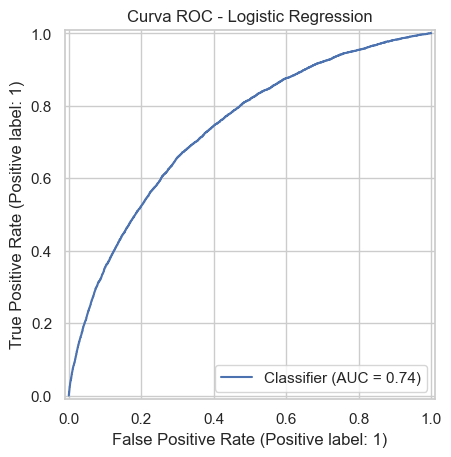


Modelo: Random Forest
Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     70672
           1       0.40      0.00      0.01      6206

    accuracy                           0.92     76878
   macro avg       0.66      0.50      0.48     76878
weighted avg       0.88      0.92      0.88     76878

Matriz de Confusão:
 [[70648    24]
 [ 6190    16]]
ROC AUC Score: 0.7103055738799153


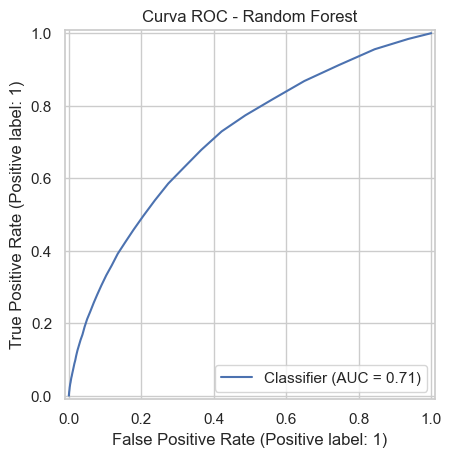

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt

# Pipeline Logistic Regression
pipe_logreg = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, random_state=45, class_weight='balanced'))
])

# Pipeline Random Forest
pipe_rf = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=45, class_weight='balanced'))
])

# Treinando os modelos
pipe_logreg.fit(X_train, y_train)
pipe_rf.fit(X_train, y_train)


# Avaliação
models = {'Logistic Regression': pipe_logreg, 'Random Forest': pipe_rf}

for name, model in models.items():
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    print(f"\nModelo: {name}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred))
    print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

    RocCurveDisplay.from_predictions(y_test, y_proba)
    plt.title(f"Curva ROC - {name}")
    plt.show()